In [19]:
from gen_meta import *

Given a time series of length 96 <ts><ts/>, please answer the following question. Find the minimum and maximum values of the time series.The answer format is: The minimum value of the time series is xxx, and the maximum value is xxx.
The minimum value of the time series is -51.30, and the maximum value is 122.78.


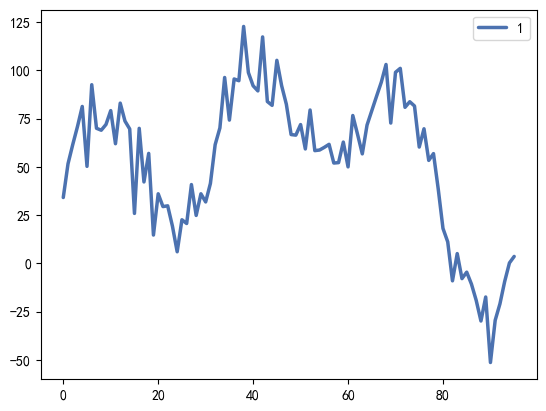

In [20]:
def gen_extreme_task(length=None, ts_num=1, lan='en'):
    output_text = ''
    if ts_num == 1:
        if length is None:
            length = random.choice([64, 128, 256, 336, 512])
        base, meta_base = gen_trend(length, 'random')
        season, meta_season = gen_season(length, 'random')
        segment, meta_segment = gen_segment(length, 'random')
        spike, meta_spike = gen_spike(length, 'random', spike_num=random.randint(0, 0))
        noise = np.random.normal(0, 0.05, length)
        ts_mean = np.random.uniform(-0.3, 0.3)
        ts_factor = np.random.uniform(1, 300)
        func = (ts_mean + base + season + segment + spike + noise) * ts_factor
        func = np.round(func, 3)
        input_text_zh = f'已知有一条长度为 {length} 的时间序列<ts><ts/>，请回答以下问题。请找出该时间序列的最小值和最大值。'
        input_text = f'Given a time series of length {length} <ts><ts/>, please answer the following question. Find the minimum and maximum values of the time series.'
        input_format_zh = f'回答格式为：该时间序列的最小值为 xxx，最大值为 xxx。'
        input_format = f'The answer format is: The minimum value of the time series is xxx, and the maximum value is xxx.'
        if lan == 'zh':
            input_text = input_text_zh
            input_format = input_format_zh
        
        answer = {
            'min': float(np.min(func)),
            'max': float(np.max(func))
        }
        if lan == 'zh':
            output_text = f'该时间序列的最小值为 {answer["min"]:.2f}，最大值为 {answer["max"]:.2f}。'
        else :
            output_text = f'The minimum value of the time series is {answer["min"]:.2f}, and the maximum value is {answer["max"]:.2f}.'
        return {
            'question': input_text,
            'answer': answer,
            'input': input_text+input_format,
            'output': output_text,
            'timeseries': [func.tolist()],
        }
    else :
        if length is None:
            length = random.choice([64, 128, 256, 336, 512])
        if ts_num == -1:
            ts_num = random.randint(2, min(3000//length, 10))
        ts_list = []
        for i in range(ts_num):
            base, meta_base = gen_trend(length, 'random')
            season, meta_season = gen_season(length, 'random')
            segment, meta_segment = gen_segment(length, 'random')
            spike, meta_spike = gen_spike(length, 'random', spike_num=random.randint(1, 6))
            noise = np.random.normal(0, 0.05, length)
            ts_mean = np.random.uniform(-0.3, 0.3)
            ts_factor = np.random.uniform(1, 300)
            func = (ts_mean + base + season + segment + spike + noise) * ts_factor
            func = np.round(func, 3)
            ts_list.append(func)
        input_text = f'已知有多条时间序列，其中'
        input_text += ', '.join([f'时间序列{i+1}为长度{length}的时间序列<ts><ts/>;' for i in range(ts_num)]) + '。请依次找出每条时间序列的最小值和最大值。'
        input_format = f'回答格式为：时间序列i的最小值为 xxx，最大值为 xxx。'
        if lan == 'en':
            input_text = f'Given multiple time series, among which '
            input_text += ', '.join([f'Time series {i+1} is a time series of length {length} <ts><ts/>' for i in range(ts_num)]) + '. Please find the minimum and maximum values of each time series in order.'
            input_format = f'The answer format is: The minimum value of time series i is xxx, and the maximum value is xxx.'
        answer = {}
        output_text = f'根据相关信息，所问的最小值和最大值依次为:\n'
        if lan == 'en':
            output_text = f'According to the relevant information, the minimum and maximum values are as follows:\n'
        for t in range(ts_num):
            answer[f'ts_{t+1}'] = {
                'min': float(np.min(ts_list[t])),
                'max': float(np.max(ts_list[t]))
            }
            output_text += f'时间序列{t+1}的最小值为 {answer[f"ts_{t+1}"]["min"]:.2f}，最大值为 {answer[f"ts_{t+1}"]["max"]:.2f}。\n'
            if lan == 'en':
                output_text += f'The minimum value of time series {t+1} is {answer[f"ts_{t+1}"]["min"]:.2f}, and the maximum value is {answer[f"ts_{t+1}"]["max"]:.2f}.\n'
        return {
            'question': input_text,
            'answer': answer,
            'timeseries': [ts.tolist() for ts in ts_list],
            'input': input_text+input_format,
            'output': output_text
        }
# 测试上述函数
qa_example = gen_extreme_task(length=96, ts_num=1)
print(qa_example['input'])
print(qa_example['output'])
visual_func(len(qa_example['timeseries'][0]), [i for i in qa_example['timeseries']] if type(qa_example['timeseries'][0]) is list else [qa_example['timeseries']]) 
#visual_timeseries(96, [i for i in qa_example['timeseries']] if type(qa_example['timeseries'][0]) is list else [qa_example['timeseries']])
import json, os
if not os.path.exists('./datasets/'):
    os.makedirs('./datasets/')
uni_extreme_qa = []
multi_extreme_qa = []
for i in range(100):
    uni_extreme_qa.append(gen_extreme_task(ts_num=1))
    multi_extreme_qa.append(gen_extreme_task(ts_num=-1))
json.dump(uni_extreme_qa, open('./datasets/uni_extreme_task_eval.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)
json.dump(multi_extreme_qa, open('./datasets/multi_extreme_task_eval.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)

Given a time series of length 196 <ts><ts/>, please answer the following question. Does the time series have change points? If so, at which points?If there are change points, the answer format is: The time series has trend change points, and the change points are at the i-th points. Otherwise, answer: The overall trend of the time series is consistent, and there are no change points. There is no need to consider the specific trends of each time period, just answer the change point information.
The time series has trend change points, and the change points are at the 120 points.
{'has_change_point': True, 'change_points': [120]}


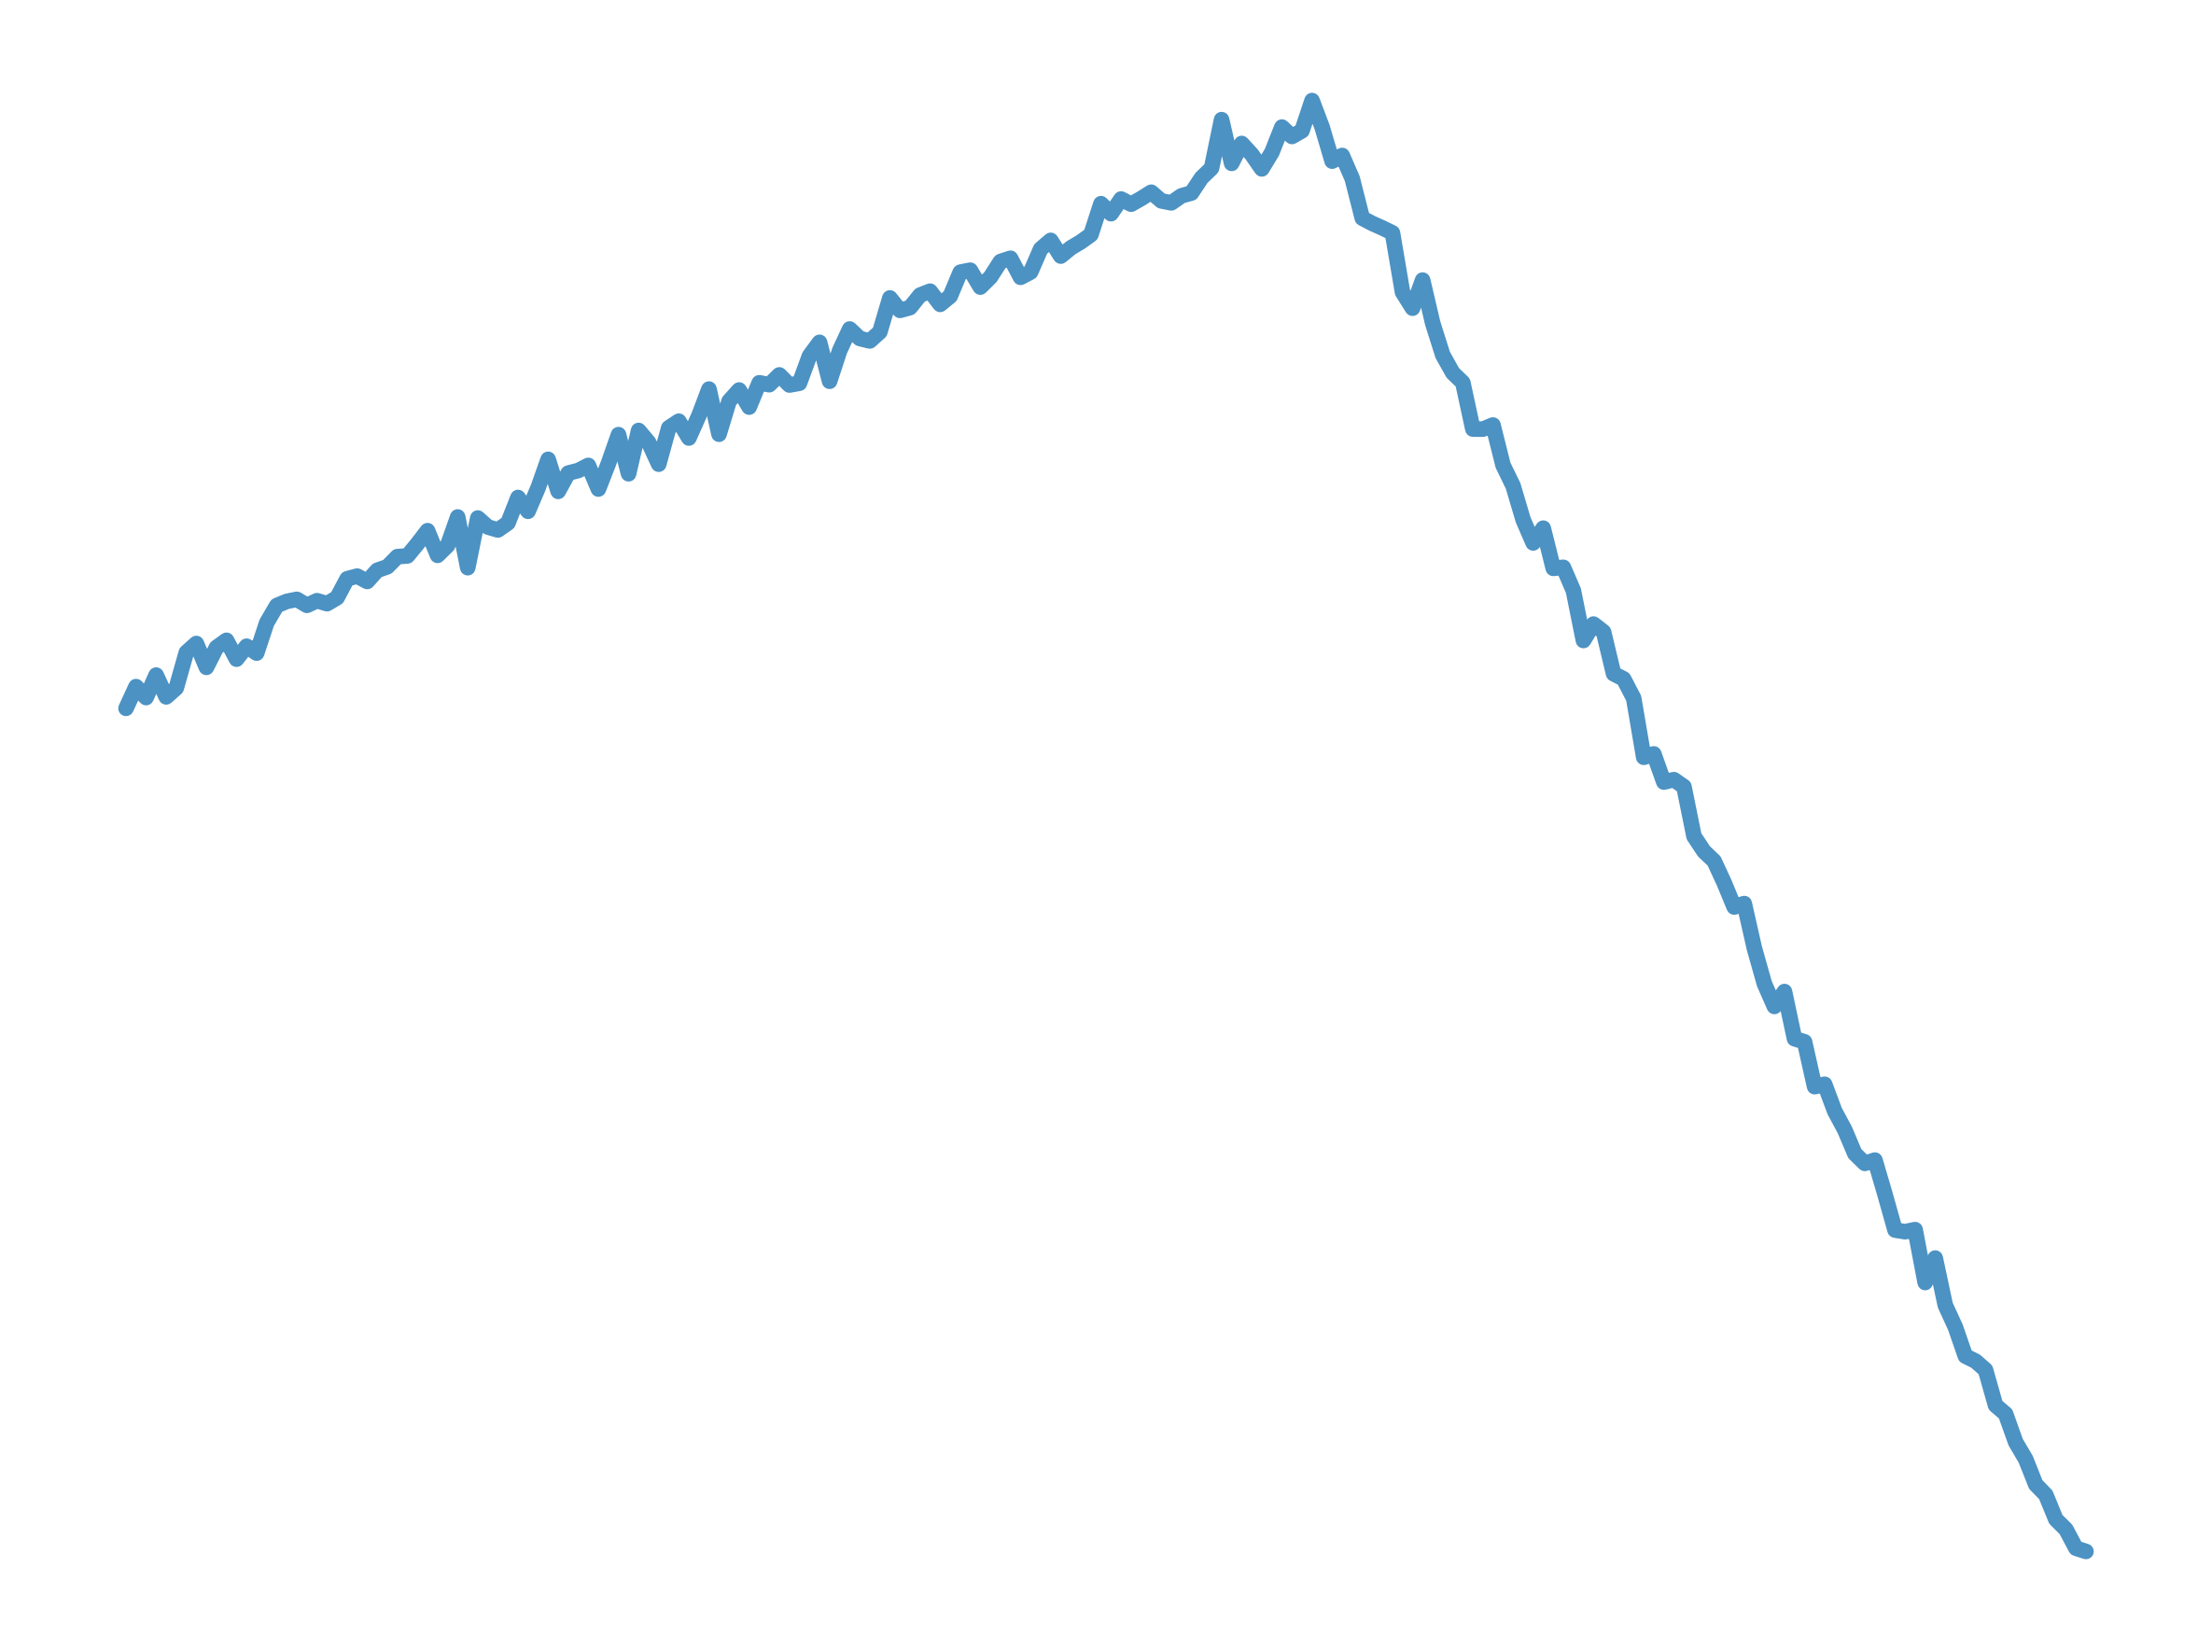

In [33]:
import numpy as np
import random

def gen_change_point(length=None, ts_num=1, ts_change_num=1, lan='en'):
    def gen_up_down_trend(length, trend, start_value=0, prev_alpha=None): 
        alpha = None
        cnt = 0.1 * length
        while alpha is None or (prev_alpha is not None and abs(alpha - prev_alpha) < 0.5):
            if trend == 'up':
                end_value = start_value + random.uniform(cnt, 0.5 + cnt)
            else:
                end_value = start_value - random.uniform(cnt, 0.5 + cnt)
            cnt += 0.5
            alpha = (end_value - start_value) / length
        trend = np.linspace(start_value, end_value, length)
        return trend, alpha
    def gen_oscillate_trend(length, start_value=0): 
        period = random.randint(1, length // 2)
        amplitude = random.uniform(0.3, 0.7)
        x = np.arange(length)
        trend = start_value + amplitude * np.sin(2 * np.pi * x / period)
        return trend, period, amplitude
    def gen_platform_trend(length, trend, start_value=0): 
        if trend == 'platform_up':
            level = start_value + random.uniform(0.5, 1)
        else:
            level = start_value - random.uniform(0.5, 1)
        trend = np.ones(length) * level
        trend[-1] = start_value
        return trend, level
    def norm_ts(ts):
        ts_min = ts.min()
        ts_max = ts.max()
        if ts_max - ts_min < 1e-6:
            return ts - ts_min
        return (ts - ts_min) / (ts_max - ts_min)
    def reconstruct_ts(ts, ts_factor=None):
        ts = norm_ts(ts)
        ts_mean = random.uniform(-0.3, 0.3)
        ts_noise = np.random.normal(0, 0.01, len(ts))
        if ts_factor is None:
            ts_factor = random.uniform(1, 300)
        ts = (ts_mean + ts + ts_noise) * ts_factor
        return ts
    if ts_change_num is None:
        ts_change_num = random.randint(0, 1)
    if length is None:
        length = random.choice([64, 128, 256, 336, 512])
        if random.randint(1, 10) > 7:
            length = random.randint(64, 336)
    if ts_num == -1:
        ts_num = random.randint(2, min(3000//length, 10))
    trend_types = ['up', 'down', 'stable', 'oscillate', 'platform_up', 'platform_down']
    weights = [0.3, 0.3, 0.4, 0., 0., 0.]
    trend_desc = {
        'up': '上升',
        'down': '下降',
        'stable': '平稳',
        'oscillate': '振荡',
        'platform_up': '平台上升',
        'platform_down': '平台下降'
    }
    if lan == 'en':
        trend_desc = {
            'up': 'increase',
            'down': 'decrease',
            'stable': 'stable',
            'oscillate': 'oscillating',
            'platform_up': 'platform upward',
            'platform_down': 'platform downward'
        }
    if ts_num == 1:
        change_idx_list = []
        if ts_change_num > 0:
            segment_len = length // (ts_change_num + 1)
            for i in range(ts_change_num):
                change_idx = random.randint(i * segment_len + segment_len // 2, (i + 1) * segment_len + segment_len // 2 - 1)
                change_idx_list.append(change_idx)
            change_idx_list = sorted(change_idx_list)
        segment_trend_list = []
        start_idx = 0
        prev_trend = None
        prev_alpha = None
        ts = np.array([])
        for change_idx in change_idx_list + [length]:
            segment_len = change_idx - start_idx
            trend_type = random.choices(trend_types, weights)[0]
            if prev_trend is not None:
                while trend_type == prev_trend:
                    trend_type = random.choices(trend_types, weights)[0]
            prev_trend = trend_type
            segment_trend_list.append((change_idx, trend_type))
            if trend_type in ['up', 'down']:
                segment, alpha = gen_up_down_trend(segment_len, trend_type, start_value=ts[-1] if len(ts) > 0 else 0, prev_alpha=prev_alpha)
                prev_alpha = alpha
            elif trend_type == 'stable':
                segment = np.ones(segment_len) * (ts[-1] if len(ts) > 0 else 0)
                prev_alpha = None
            elif trend_type == 'oscillate':
                segment, period, amplitude = gen_oscillate_trend(segment_len, start_value=ts[-1] if len(ts) > 0 else 0)
                prev_alpha = None
            elif trend_type in ['platform_up', 'platform_down']:
                segment, level = gen_platform_trend(segment_len, trend_type, start_value=ts[-1] if len(ts) > 0 else 0)
                prev_alpha = None
            ts = np.concatenate([ts, segment])
            start_idx = change_idx
        ts = reconstruct_ts(ts)
        ts = np.round(ts, 3)
        input_text = f'已知有一条长度为 {length} 的时间序列<ts><ts/>，请回答以下问题。请问该时间序列中是否存在变化点？如果存在，变化点在第几个点？'
        input_format = f'如果存在变化点，回答格式为：该时序存在趋势变化点，变化点为第 i 个点。 否则回答：该时序整体趋势一致，不存在变化点。无需考虑每个时间段的具体趋势，直接回答变点信息。'
        output_text = f'该时序存在趋势变化点，变化点为第 {", ".join(str(idx + 1) for idx in change_idx_list)} 个点。' if len(change_idx_list) > 0 else '该时序整体趋势一致，不存在趋势变化点。'
        if lan == 'en':
            input_text = f'Given a time series of length {length} <ts><ts/>, please answer the following question. Does the time series have change points? If so, at which points?'
            input_format = f'If there are change points, the answer format is: The time series has trend change points, and the change points are at the i-th points. Otherwise, answer: The overall trend of the time series is consistent, and there are no change points. There is no need to consider the specific trends of each time period, just answer the change point information.'
            output_text = f'The time series has trend change points, and the change points are at the {", ".join(str(idx + 1) for idx in change_idx_list)} points.' if len(change_idx_list) > 0 else 'The overall trend of the time series is consistent, and there are no trend change points.'
        answer = {
            'has_change_point': len(change_idx_list) > 0,
            "change_points": [idx + 1 for idx in change_idx_list]  # 从1开始计数
        }
        return {
            'question': input_text,
            'answer': answer,
            'timeseries': [ts.tolist()],
            'input': input_text + input_format,
            'output': output_text,
            'meta': {
                'segment_trend_list': [(idx + 1, trend_desc[trend]) for idx, trend in segment_trend_list]
            }
        }
    else:
        ts_list = []
        answer = {}
        output_text = '根据相关信息，各时序分析如下：\n'
        input_text = f'已知有多条时间序列，其中'
        input_text += ', '.join([f'时间序列{i+1}为长度{length}的时间序列<ts><ts/>;' for i in range(ts_num)]) + f'。请依次回答每条时间序列中是否存在变化点？如果存在，变化点在第几个点？'
        input_format = f'回答格式为：时间序列i中整体趋势平稳/存在变化点，为第 i 个点。无需考虑每个时间段的具体趋势，直接回答变点信息。'
        if lan == 'en':
            input_text = f'Given multiple time series, among which '
            input_text += ', '.join([f'Time series {i+1} is a time series of length {length} <ts><ts/>' for i in range(ts_num)]) + f'. Please answer in order whether each time series has change points? If so, at which points?'
            input_format = f'The answer format is: The overall trend in time series i is stable/there are change points at the i-th points. There is no need to consider the specific trends of each time period, just answer the change point information.'
        for t in range(ts_num):
            change_idx_list = []
            now_change_num = random.choices([0, 1], [0.4, 0.6])[0]
            if now_change_num > 0:
                segment_len = length // (now_change_num + 1)
                change_idx = random.randint(segment_len // 2, segment_len + segment_len // 2 - 1)
                change_idx_list.append(change_idx)
            segment_trend_list = []
            start_idx = 0
            prev_trend = None
            prev_alpha = None
            ts = np.array([])
            for change_idx in change_idx_list + [length]:
                segment_len = change_idx - start_idx
                trend_type = random.choices(trend_types, weights)[0]
                if prev_trend is not None:
                    while trend_type == prev_trend:
                        trend_type = random.choices(trend_types, weights)[0]
                prev_trend = trend_type
                segment_trend_list.append((change_idx, trend_type))
                if trend_type in ['up', 'down']:
                    segment, alpha = gen_up_down_trend(segment_len, trend_type, start_value=ts[-1] if len(ts) > 0 else 0, prev_alpha=prev_alpha)
                    prev_alpha = alpha
                elif trend_type == 'stable':
                    segment = np.ones(segment_len) * (ts[-1] if len(ts) > 0 else 0)
                    prev_alpha = None
                elif trend_type == 'oscillate':
                    segment, period, amplitude = gen_oscillate_trend(segment_len, start_value=ts[-1] if len(ts) > 0 else 0)
                    prev_alpha = None
                elif trend_type in ['platform_up', 'platform_down']:
                    segment, level = gen_platform_trend(segment_len, trend_type, start_value=ts[-1] if len(ts) > 0 else 0)
                    prev_alpha = None
                ts = np.concatenate([ts, segment])
                start_idx = change_idx
            ts = reconstruct_ts(ts)
            ts = np.round(ts, 3)
            ts_list.append(ts.tolist())
            if change_idx_list:
                answer[f'ts_{t+1}'] = {
                    'has_change_point': True,
                    'change_points': [idx + 1 for idx in change_idx_list]
                }
                output_text += f'时间序列{t+1}中存在变化点，为第 {change_idx_list[0] + 1} 个点。\n'
                if lan == 'en':
                    output_text += f'The overall trend in time series {t+1} is unstable, and there are change points at the {", ".join(str(idx + 1) for idx in change_idx_list)} points.\n'
            else:
                answer[f'ts_{t+1}'] = {
                    'has_change_point': False,
                    'change_points': []
                }
                output_text += f'时间序列{t+1}中整体趋势一致，不存在趋势变化点。\n'
                if lan == 'en':
                    output_text += f'The overall trend in time series {t+1} is stable, and there are no trend change points.\n'

        return {
            'question': input_text,
            'answer': answer,
            'timeseries': ts_list,
            'input': input_text + input_format,
            'output': output_text,
            'meta': {
                'test':''
            }
        }

# Example usage
qa_example = gen_change_point(length=196, ts_num=1)
print(qa_example['input'])
print(qa_example['output'])
print(qa_example['answer'])
# Note: visual_func is not defined in the provided code, so it is commented out
#visual_func(64, [i for i in qa_example['timeseries']] if type(qa_example['timeseries'][0]) is list else [qa_example['timeseries']])
visual_timeseries(196, [i for i in qa_example['timeseries']] if type(qa_example['timeseries'][0]) is list else [qa_example['timeseries']])
import json
uni_change_point_qa = []
multi_change_point_qa = []
for i in range(100):
    uni_change_point_qa.append(gen_change_point(length=None, ts_num=1))
    multi_change_point_qa.append(gen_change_point(length=None, ts_num=-1))
json.dump(uni_change_point_qa, open('./datasets/uni_change_point_task_eval.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)
json.dump(multi_change_point_qa, open('./datasets/multi_change_point_task_eval.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)


Given multiple time series, among which Time series 1 is a time series of length 200 <ts><ts/>, Time series 2 is a time series of length 200 <ts><ts/>, Time series 3 is a time series of length 200 <ts><ts/>, Time series 4 is a time series of length 200 <ts><ts/>, Time series 5 is a time series of length 200 <ts><ts/>, Time series 6 is a time series of length 200 <ts><ts/>, Time series 7 is a time series of length 200 <ts><ts/>, Time series 8 is a time series of length 200 <ts><ts/>. Please answer in order what is the overall trend of each time series? Is it increasing, decreasing, or stable?The answer format is: The overall trend in time series i is ___. (increasing, decreasing, stable)
According to the relevant information, the analysis of each time series is as follows:
The overall trend in time series 1 is stable.
The overall trend in time series 2 is increase.
The overall trend in time series 3 is decrease.
The overall trend in time series 4 is stable.
The overall trend in time ser

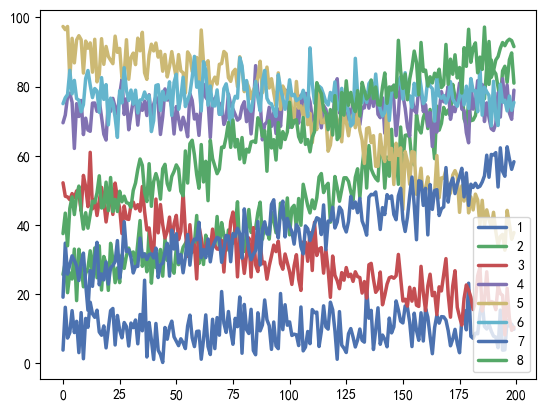

In [34]:
def gen_trend_task(length=None, ts_num=1, lan='en'):
    # 趋势任务： 询问时间序列的整体趋势是上升、下降还是平稳
    # 答案格式为 {"trend": "up"|"down"|"stable"}
    # 每个时间序列都只有一段非常明显的趋势，保证上升、下降的趋势是显著的（相对length来进行调节，不要出现太长时变化率太小）
    zh_trend = {
        'up' : '上升',
        'down' : '下降',
        'stable' : '平稳'
    }
    if lan == 'en':
        zh_trend = {
            'up' : 'increase',
            'down' : 'decrease',
            'stable' : 'stable'
        }
    if ts_num == 1:
        if length is None:
            length = random.choice([64, 128, 256, 336, 512])
            length = random.randint(64, 512)
        ts_factor = np.random.uniform(1, 300) 
        trend_type = random.choices(['up', 'down', 'stable'], [0.4, 0.4, 0.2])[0]
        base, meta_base = gen_trend(length, trend_type=trend_type)
        noise = np.random.normal(0, 0.005, length)
        
        ts_mean = np.random.uniform(-0.3, 0.3)
        ts = ts_mean + base + noise
        func = ts * ts_factor
        func = np.round(func, 3)
        input_text = f'已知有一条长度为 {length} 的时间序列<ts><ts/>，请回答以下问题。请问该时间序列的整体趋势是上升、下降还是平稳？'
        input_format = f'直接回答：该时序整体趋势为___。(上升、下降、平稳)'
        output_text = f'该时序整体趋势为{zh_trend[trend_type]}。'
        if lan == 'en':
            input_text = f'Given a time series of length {length} <ts><ts/>, please answer the following question. What is the overall trend of the time series? Is it increasing, decreasing, or stable?'
            input_format = f'Directly answer: The overall trend of the time series is ___. (increasing, decreasing, stable)'
            output_text = f'The overall trend of the time series is {trend_type}.'
        answer = {
            "trend": trend_type
        }
        return {
            'question': input_text,
            'answer': answer,
            'input': input_text+input_format,
            'output': output_text,
            'timeseries': func.tolist(),
        }
    else :
        if length is None:
            length = random.choice([64, 128, 256, 336, 512])
        if ts_num == -1:
            ts_num = random.randint(2, min(3000//length, 10))
        ts_factor = np.random.uniform(1, 300)
        ts_list = []
        trend_list = []
        for i in range(ts_num):
            trend_type = random.choices(['up', 'down', 'stable'], [0.4, 0.4, 0.2])[0]
            base, meta_base = gen_trend(length, trend_type=trend_type)
            noise = np.random.normal(0, 0.05, length)
            ts_mean = np.random.uniform(-0.3, 0.3)
            func = (ts_mean + base + noise) * ts_factor
            func = np.round(func, 3)
            ts_list.append(func)
            trend_list.append(trend_type)
        input_text = f'已知有多条时间序列，其中'
        input_text += ', '.join([f'时间序列{i+1}为长度{length}的时间序列<ts><ts/>;' for i in range(ts_num)]) + f'。请依次回答每条时间序列的整体趋势是上升、下降还是平稳？'
        input_format = f'回答格式为：时间序列i中整体趋势为___。(上升、下降、平稳)'
        output_text = f'根据相关信息，对各时序分析如下：\n'
        if lan == 'en':
            input_text = f'Given multiple time series, among which '
            input_text += ', '.join([f'Time series {i+1} is a time series of length {length} <ts><ts/>' for i in range(ts_num)]) + f'. Please answer in order what is the overall trend of each time series? Is it increasing, decreasing, or stable?'
            input_format = f'The answer format is: The overall trend in time series i is ___. (increasing, decreasing, stable)'
            output_text = f'According to the relevant information, the analysis of each time series is as follows:\n'
        answer = {}
        for t in range(ts_num):
            answer[f'ts_{t+1}'] = {
                "trend": trend_list[t]
            }
            if lan == 'zh':
                output_text += f'时间序列{t+1}整体趋势为{zh_trend[trend_list[t]]}。\n'
            if lan == 'en':
                output_text += f'The overall trend in time series {t+1} is {zh_trend[trend_list[t]]}.\n'
        return {
            'question': input_text,
            'answer': answer,
            'timeseries': [ts.tolist() for ts in ts_list],
            'input': input_text+input_format,
            'output': output_text
        }

qa_example = gen_trend_task(length=200, ts_num=random.choices([1, -1], [0.5, 0.5])[0])
print(qa_example['input'])
print(qa_example['output'])
visual_func(200, [i for i in qa_example['timeseries']] if type(qa_example['timeseries'][0]) is list else [qa_example['timeseries']]) 

uni_trend_qa = []
multi_trend_qa = []
for i in range(100):
    length = random.randint(196, 336)
    uni_trend_qa.append(gen_trend_task(length=length, ts_num=1))
    multi_trend_qa.append(gen_trend_task(length=length, ts_num=-1))
json.dump(uni_trend_qa, open('./datasets/uni_trend_task_eval.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)
json.dump(multi_trend_qa, open('./datasets/multi_trend_task_eval.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)
        

Given multiple time series, among which Time series 1 is a time series of length 200 <ts><ts/>, Time series 2 is a time series of length 200 <ts><ts/>. Please answer in order whether each time series has spikes? If so, at which points? And answer the direction of the spike.The answer format is: There is a spike in time series i, the spike is at point k, and the direction is upward/downward. / There is no spike in time series i.
Do not consider the specific magnitude of the spike, just answer the spike information.
The analysis of each time series is as follows:
时间序列1中存在突刺，突刺在第 173 个点，方向为向下。
There is a spike in time series 1, the spike is at point 173, and the direction is 向下.
时间序列2中存在突刺，突刺在第 138 个点，方向为向上。
There is a spike in time series 2, the spike is at point 138, and the direction is 向上.



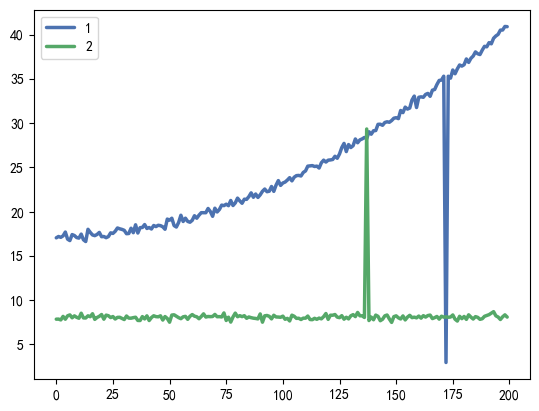

In [23]:
def gen_spike_task(length=None, ts_num=1, lan='en'):
    if ts_num == 1:
        if length is None:
            length = random.choice([64, 128, 256, 336, 512])
        base, meta_base = gen_trend(length, 'random')
        noise = np.random.normal(0, 0.005, length)
        ts_mean = np.random.uniform(-0.3, 0.3)
        ts_factor = np.random.uniform(1, 100)
        func = (ts_mean + base + noise) * ts_factor 
        func = np.round(func, 3)
        has_spike = random.choices([True, False], [0.7, 0.3])[0]
        input_format = f'如果存在突刺，回答格式为：该时序存在突刺，突刺在第 i 个点，方向为向上/向下。 否则回答：该时序不存在突刺。无需考虑突刺的具体幅度，直接回答突刺信息。'
        if lan == 'en':
            input_format = f'If there is a spike, the answer format is: There is a spike in this time series, the spike is at point i, and the direction is upward/downward. Otherwise, answer: There is no spike in this time series. Do not consider the specific magnitude of the spike, just answer the spike information.'

        if has_spike:
            spike_point = random.randint(1, length - 2)
            spike_type = random.choice(['up', 'down'])
            spike = np.zeros(length)
            spike[spike_point] = np.random.uniform(0.5, 1.) if spike_type == 'up' else np.random.uniform(-1., -0.5)
            func += spike * ts_factor
            func = np.round(func, 3)
            input_text = f'已知有一条长度为 {length} 的时间序列<ts><ts/>，请回答以下问题。请问该时间序列中是否存在突刺？如果存在，突刺在第几个点？并回答突刺的方向。'
            if lan == 'en':
                input_text = f'Given a time series of length {length} <ts><ts/>, please answer the following question. Does the time series have spikes? If so, at which points? And answer the direction of the spike.'
            spike_type_zh = '向上' if spike_type == 'up' else '向下'
            if lan == 'en':
                spike_type_zh = 'upward' if spike_type == 'up' else 'downward'
            output_text = f'该时序中存在突刺，突刺在第 {spike_point + 1} 个点，方向为{spike_type_zh}。'
            if lan == 'en':
                output_text = f'There is a spike in this time series, the spike is at point {spike_point + 1}, and the direction is {spike_type_zh}.'
            answer = {
                "has_spike": True,
                "spike_points": [spike_point + 1]  # 从1开始计数
            }
        else:
            input_text = f'已知有一条长度为 {length} 的时间序列<ts><ts/>，请回答以下问题。请问该时间序列中是否存在突刺？如果存在，突刺在第几个点？'
            output_text = f'该时序中不存在突刺。'
            if lan == 'en':
                input_text = f'Given a time series of length {length} <ts><ts/>, please answer the following question. Does the time series have spikes? If so, at which points?'
                output_text = f'There is no spike in this time series.'
            answer = {
                "has_spike": False,
                "spike_points": []
            }
        return {
            'question': input_text,
            'answer': answer,
            'input': input_text + input_format,
            'output': output_text,
            'timeseries': func.tolist(),
        }
    else :
        if length is None:
            length = random.choice([64, 128, 256, 336, 512])
        if ts_num == -1:
            ts_num = random.randint(2, min(3000//length, 10))
        ts_list = []
        spike_points_list = []
        ts_factor = np.random.uniform(1, 100)
        spike_zh = {}
        for i in range(ts_num):
            base, meta_base = gen_trend(length, 'random')
            noise = np.random.normal(0, 0.005, length)
            ts_mean = np.random.uniform(-0.3, 0.3)
            
            func = (ts_mean + base + noise) * ts_factor
            func = np.round(func, 3)
            has_spike = random.choices([True, False], [0.7, 0.3])[0]
            
            if has_spike:
                spike_point = random.randint(1, length - 2)
                spike_type = random.choice(['up', 'down'])
                spike = np.zeros(length)
                spike[spike_point] = np.random.uniform(0.5, 1.) if spike_type == 'up' else np.random.uniform(-1., -0.5)

                func += spike * ts_factor
                func = np.round(func, 3)
                spike_points_list.append(spike_point + 1)
                spike_zh[f'ts_{i+1}'] = '向上' if spike_type == 'up' else '向下'
            else:
                spike_points_list.append(None)
            ts_list.append(func)
        input_text = f'已知有多条时间序列，其中'
        input_text += ', '.join([f'时间序列{i+1}为长度{length}的时间序列<ts><ts/>;' for i in range(ts_num)]) + f'。请依次回答每条时间序列中是否存在突刺？如果存在，突刺在第几个点？并回答突刺的方向。'
        input_format = f'回答格式为：时间序列i中存在突刺，突刺在第 k 个点, 为向上/向下突刺。/ 时间序列i中不存在突刺。\n无需考虑突刺的具体幅度，直接回答突刺信息。'
        if lan == 'en':
            input_text = f'Given multiple time series, among which '
            input_text += ', '.join([f'Time series {i+1} is a time series of length {length} <ts><ts/>' for i in range(ts_num)]) + f'. Please answer in order whether each time series has spikes? If so, at which points? And answer the direction of the spike.'
            input_format = f'The answer format is: There is a spike in time series i, the spike is at point k, and the direction is upward/downward. / There is no spike in time series i.\nDo not consider the specific magnitude of the spike, just answer the spike information.'
        answer = {}
        output_text = f'依次对各时序分析如下：\n'
        if lan == 'en':
            output_text = f'The analysis of each time series is as follows:\n'
        for t in range(ts_num):
            if spike_points_list[t] is not None:
                answer[f'ts_{t+1}'] = {
                    "has_spike": True,
                    "spike_points": [spike_points_list[t]]
                }
                spike_type_zh = spike_zh[f'ts_{t+1}']
                output_text += f'时间序列{t+1}中存在突刺，突刺在第 {spike_points_list[t]} 个点，方向为{spike_type_zh}。\n'
                if lan == 'en':
                    output_text += f'There is a spike in time series {t+1}, the spike is at point {spike_points_list[t]}, and the direction is {spike_type_zh}.\n'
            else:
                answer[f'ts_{t+1}'] = {
                    "has_spike": False,
                    "spike_points": []
                }
                output_text += f'时间序列{t+1}中不存在突刺。\n'
                if lan == 'en':
                    output_text += f'There is no spike in time series {t+1}.\n'
        return {
            'question': input_text,
            'answer': answer,
            'input': input_text + input_format,
            'output': output_text,
            'timeseries': [ts.tolist() for ts in ts_list],
        }
    
# 测试上述函数
qa_example = gen_spike_task(length=200, ts_num=random.choices([1, -1], [0.5, 0.5])[0])
print(qa_example['input'])
print(qa_example['output'])
visual_func(200, [i for i in qa_example['timeseries']] if type(qa_example['timeseries'][0]) is list else [qa_example['timeseries']])  # 可视化生成的时间序列数据
uni_spike_task = []
multi_spike_task = []
for i in range(100):
    uni_spike_task.append(gen_spike_task(length=None, ts_num=1))
    multi_spike_task.append(gen_spike_task(length=None, ts_num=-1))
import json
json.dump(uni_spike_task, open('datasets/uni_spike_task.json', 'w'), ensure_ascii=False, indent=4)
json.dump(multi_spike_task, open('datasets/multi_spike_task.json', 'w'), ensure_ascii=False, indent=4)

Given two time series of length 200, time series A is <ts><ts/>, and time series B is <ts><ts/>. Please answer the following question. Does time series B have obvious differences from time series A? If so, please indicate the interval of difference from which point to which point?The answer format is: There are obvious differences in time series B from time series A, and the interval of difference is from the k-th point to the m-th point. / There are no obvious differences in time series B from time series A.
There are obvious differences in time series B from time series A, and the interval of difference is from point 103 to point 144.


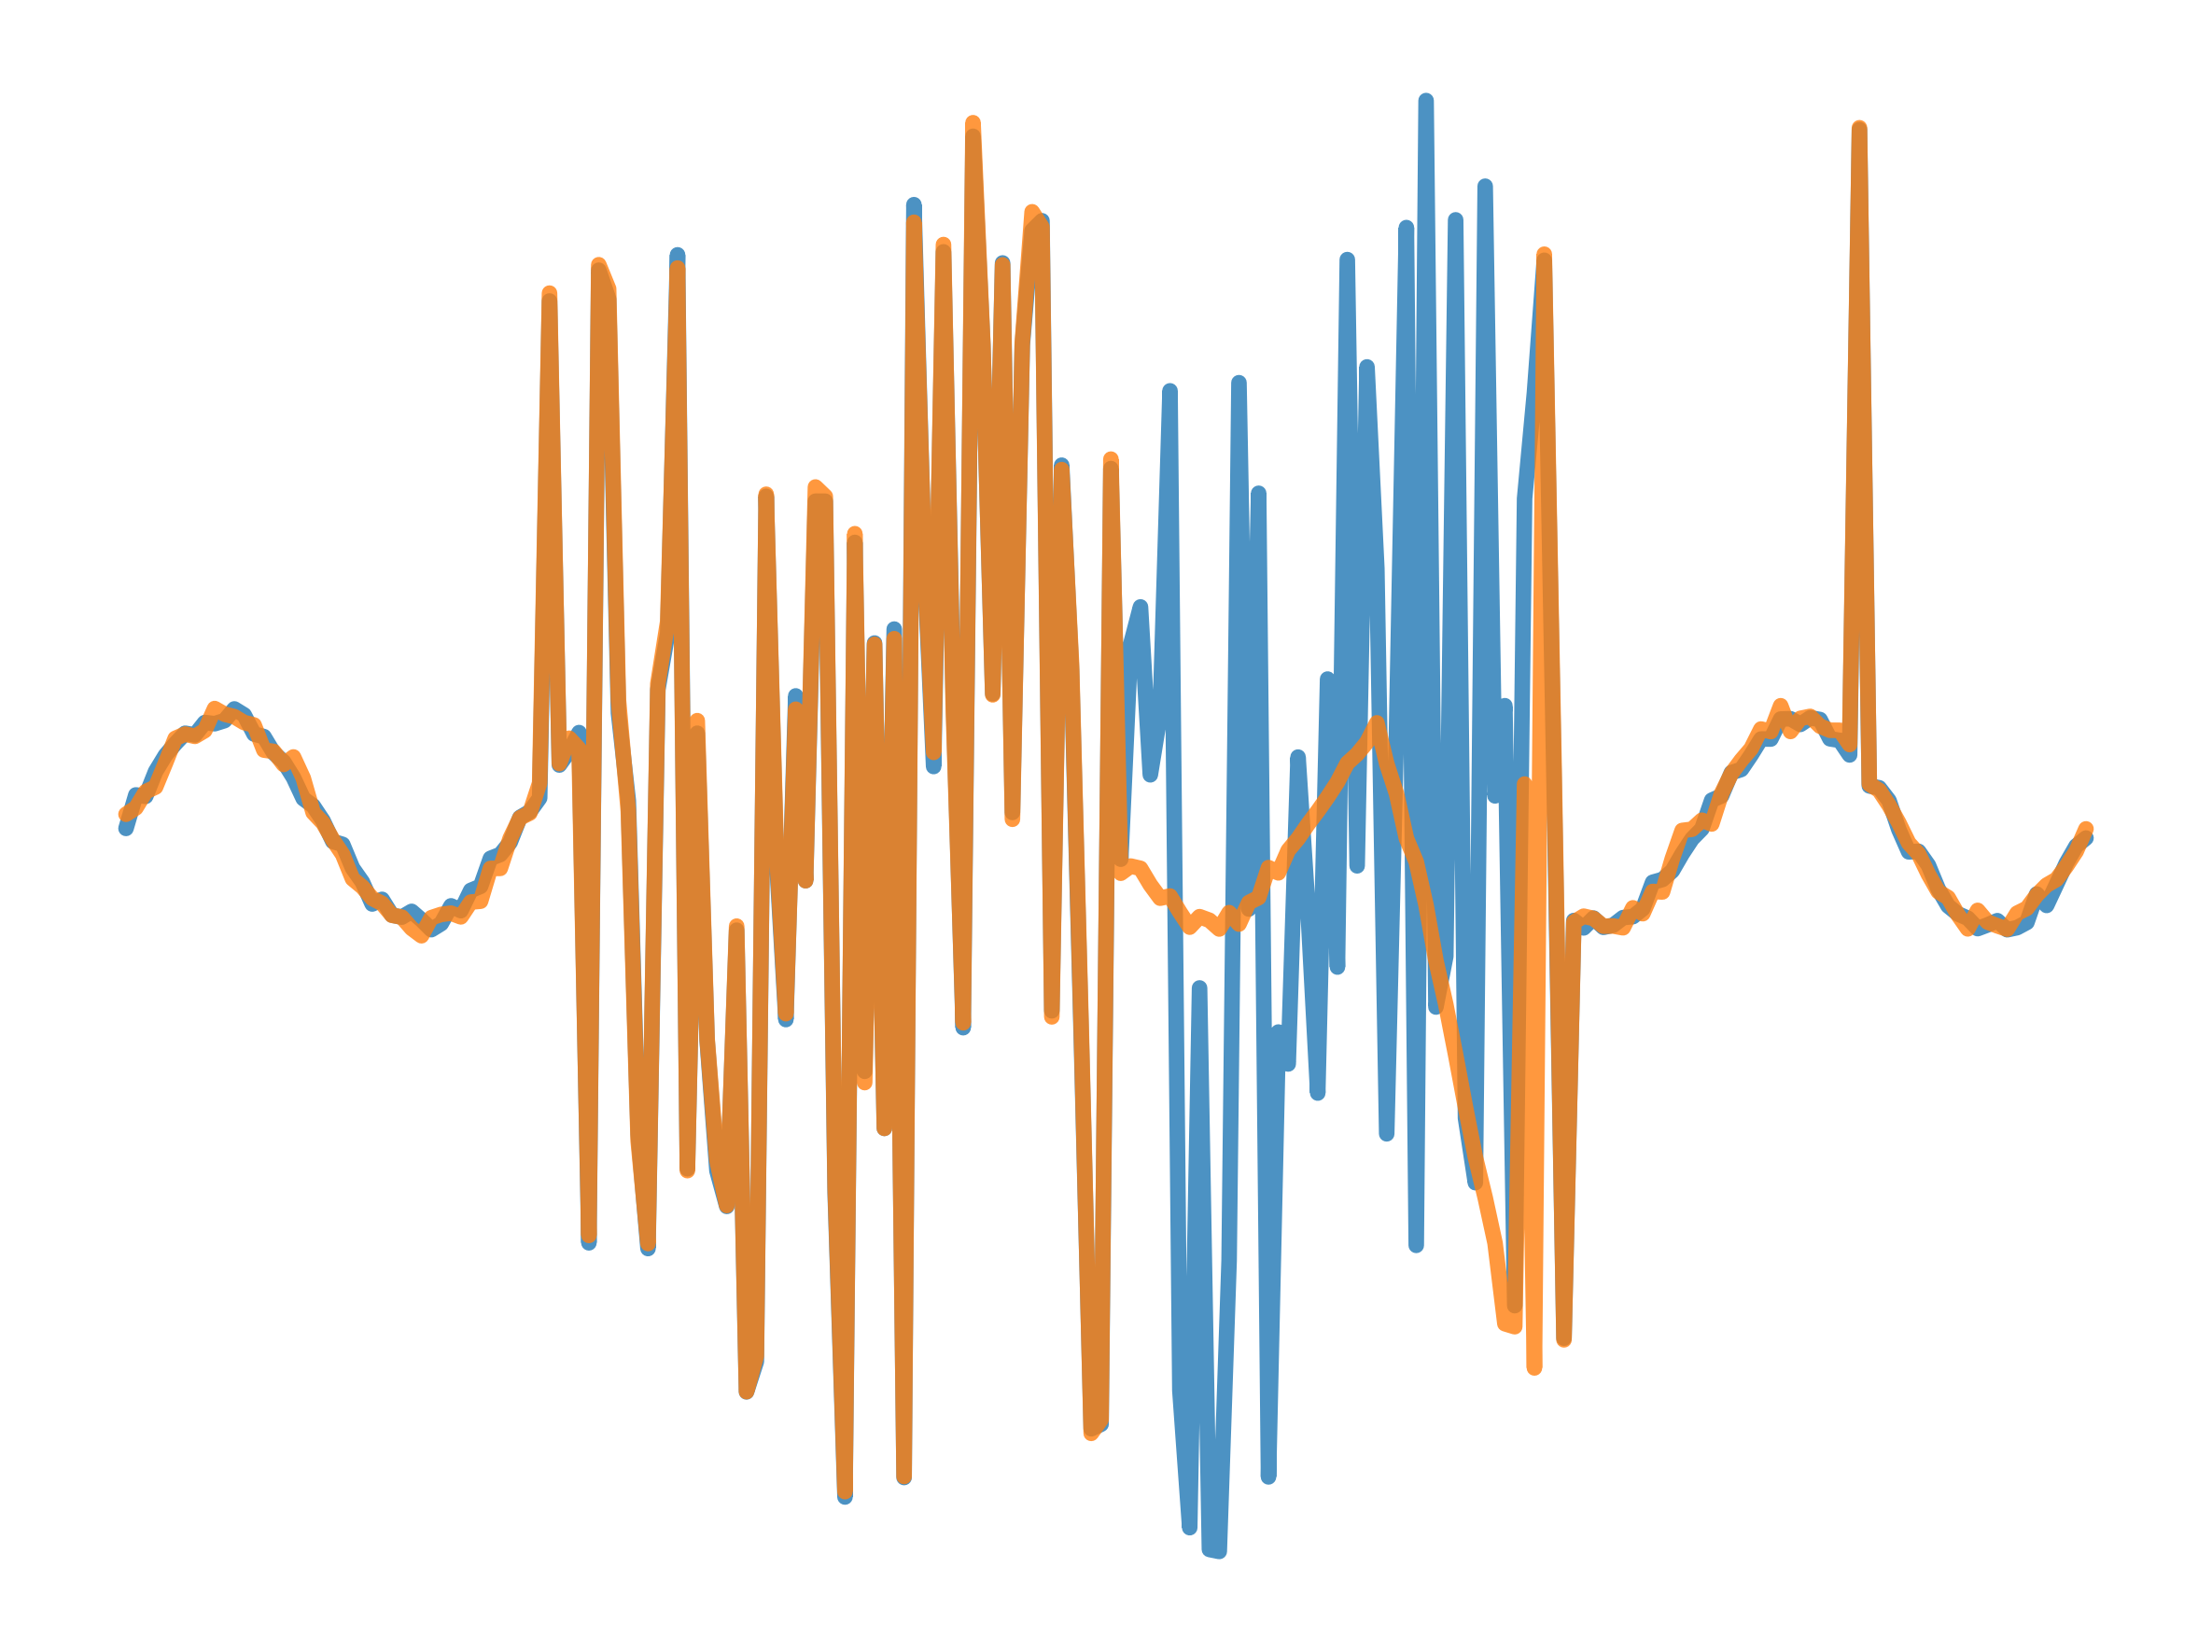

In [35]:
def gen_compare(length=None, lan='en'):
    #两条时间序列的任务，其中一条为模板时序，一条为观察时序
    #比较两条时间序列的异同（观察时序是否存在明显的和模板时序的不同）
    #生成参考gen_double_task， 输入、时序都与其一致。但在返回时使用更易于解析的结构化answer: {"has_difference": bool, "differences_interval": [start, end]}
    if length is None:
        length = random.choice([64, 128, 256, 336, 512])
    ts_factor = np.random.uniform(1, 300)
    base1, meta_base1 = gen_trend(length, 'random')
    base2 = base1.copy()
    season1, meta_season1 = gen_season(length, 'random')
    season2 = season1.copy()
    segment1, meta_segment1 = gen_segment(length, 'random')
    segment2 = segment1.copy()
    spike1, meta_spike1 = gen_spike(length, 'random', spike_num=random.randint(0, 3))
    spike2 = spike1.copy()
    noise1 = np.random.normal(0, 0.01, length)
    noise2 = np.random.normal(0, 0.01, length)
    ts_mean1 = np.random.uniform(-0.3, 0.3)
    ts_mean2 = ts_mean1
    func1 = (ts_mean1 + base1 + season1 + segment1 + spike1 + noise1) * ts_factor
    func2 = (ts_mean2 + base2 + season2 + segment2 + spike2 + noise2) * ts_factor
    func1 = np.round(func1, 3)
    func2 = np.round(func2, 3)
    has_difference = random.choices([True, False], [0.7, 0.3])[0]
    if has_difference:
        change_length = random.randint(max(3, length // 5), max(length // 4, 5))
        change_start = random.randint(0, length - change_length - 1)
        change_end = change_start + change_length - 1
        change_type = random.choice(['segment'])
        if change_type == 'trend':
            trend_type = random.choices(['up', 'down', 'stable'], [0.4, 0.4, 0.2])[0]
            new_trend, meta_new_trend = gen_trend(change_end - change_start + 1, trend_type=trend_type)
            base2[change_start:change_end + 1] = new_trend
        elif change_type == 'season':
            new_season, meta_new_season = gen_season(change_end - change_start + 1, 'random')
            season2[change_start:change_end + 1] = new_season
        elif change_type == 'segment':
            new_segment, meta_new_segment = gen_segment(change_end - change_start + 1, 'random')
            segment2[change_start:change_end + 1] = new_segment
        elif change_type == 'spike':
            new_spike, meta_new_spike = gen_spike(change_end - change_start + 1, spike_type='random', spike_num=1)
            spike2[change_start:change_end + 1] = new_spike
        func2 = (ts_mean2 + base2 + season2 + segment2 + spike2 + noise2) * ts_factor
        func2 = np.round(func2, 3)
        input_text = f'已知有两条长度为 {length} 的时间序列，时间序列A为<ts><ts/>，时间序列B为<ts><ts/>。请回答以下问题。请问时间序列B中是否存在明显的和时间序列A不同的地方？如果存在，请指出不同的区间是从第几个点到第几个点？'
        input_format = f'回答格式为：时间序列B中存在明显的和时间序列A不同的地方，不同的区间是从第 k 个点到第 m 个点。/ 时间序列B中不存在明显的和时间序列A不同的地方。'
        output_text = f'时间序列B中存在明显的和时间序列A不同的地方，不同的区间是从第 {change_start + 1} 个点到第 {change_end + 1} 个点。'
        if lan == 'en':
            input_text = f'Given two time series of length {length}, time series A is <ts><ts/>, and time series B is <ts><ts/>. Please answer the following question. Does time series B have obvious differences from time series A? If so, please indicate the interval of difference from which point to which point?'
            input_format = f'The answer format is: There are obvious differences in time series B from time series A, and the interval of difference is from the k-th point to the m-th point. / There are no obvious differences in time series B from time series A.'
            output_text = f'There are obvious differences in time series B from time series A, and the interval of difference is from point {change_start + 1} to point {change_end + 1}.'
        answer = {
            "has_difference": True,
            "differences_interval": [change_start + 1, change_end + 1]  # 从1开始计数
        }
    else:
        input_text = f'已知有两条长度为 {length} 的时间序列，时间序列A为<ts><ts/>，时间序列B为<ts><ts/>。请回答以下问题。请问时间序列B中是否存在明显的和时间序列A不同的地方？如果存在，请指出不同的区间是从第几个点到第几个点？'
        input_format = f'回答格式为：时间序列B中存在明显的和时间序列A不同的地方，不同的区间是从第 k 个点到第 m 个点。/ 时间序列B中不存在明显的和时间序列A不同的地方。'
        output_text = f'时间序列B中不存在明显的和时间序列A不同的地方。'
        if lan == 'en':
            input_text = f'Given two time series of length {length}, time series A is <ts><ts/>, and time series B is <ts><ts/>. Please answer the following question. Does time series B have obvious differences from time series A? If so, please indicate the interval of difference from which point to which point?'
            input_format = f'The answer format is: There are obvious differences in time series B from time series A, and the interval of difference is from the k-th point to the m-th point. / There are no obvious differences in time series B from time series A.'
            output_text = f'There are no obvious differences in time series B from time series A.'
        answer = {
            "has_difference": False,
            "differences_interval": []
        }
    return {
        'question': input_text,
        'answer': answer,
        'input': input_text + input_format,
        'output': output_text,
        'timeseries': [func1.tolist(), func2.tolist()],
    }
qa_example = gen_compare(length=200)
print(qa_example['input'])
print(qa_example['output'])
visual_timeseries(len(qa_example['timeseries'][0]), [i for i in qa_example['timeseries']] if type(qa_example['timeseries'][0]) is list else [qa_example['timeseries']])
double_check_task = []
for i in range(1,100):
    double_check_task.append(gen_compare())
json.dump(double_check_task,open('datasets/double_check_task_eval.json','w'), ensure_ascii=False, indent=4)

Given a time series of length 200 <ts><ts/>, please answer the following question. At which points are the trend change points in the time series? Please list all the change points in order (if there are multiple change points, please list them in ascending order).The answer format is: There are k trend change points in this time series, and the change points are at points i1, i2, ..., ik. / The overall trend in this time series is stable, and there are no trend change points. You do not need to consider the specific trend type. Just answer the format content.
There are 4 trend change points in this time series, and the change points are at points 36, 99, 115, 154.


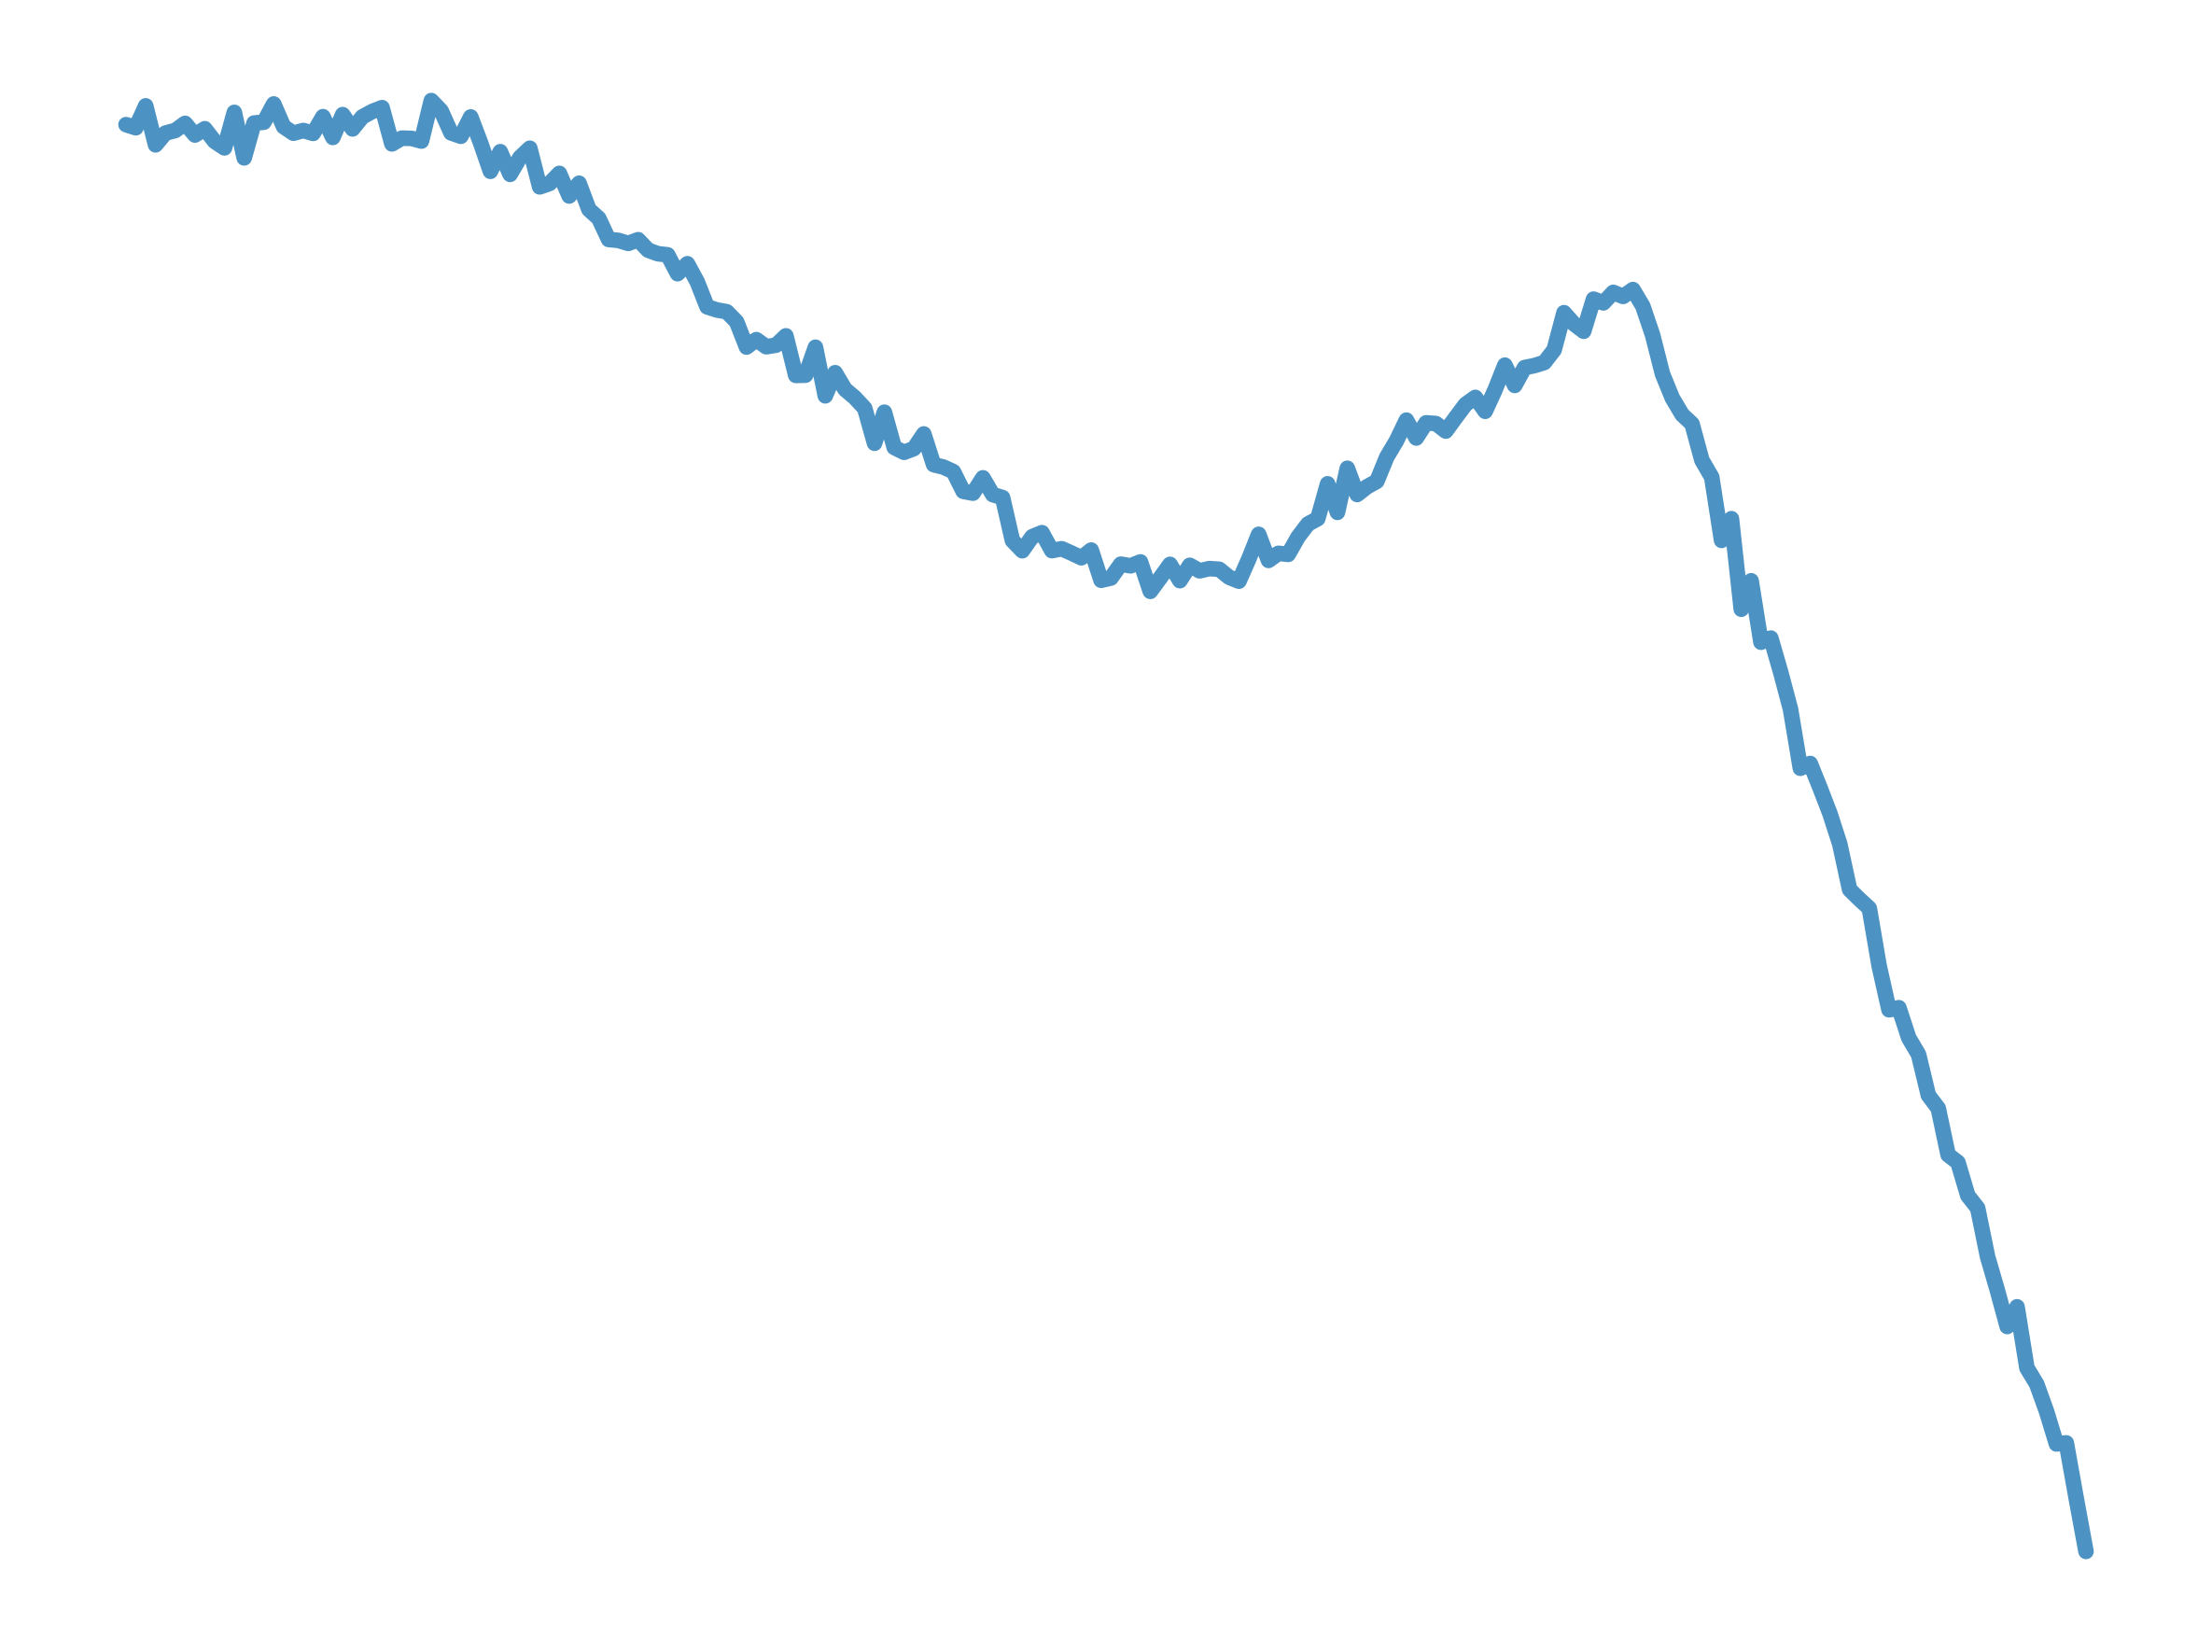

In [36]:
def gen_segment_task(length=None, lan='en'):
    if length is None:
        length = random.choice([64, 128, 256, 336, 512])
    
    ts_change_num = random.randint(2, min(6, length // 5))
    change_idx_list = []
    if ts_change_num > 0:
        segment_len = length // (ts_change_num + 1)
        for i in range(ts_change_num):
            change_idx = random.randint(i * segment_len + segment_len // 2, (i + 1) * segment_len + segment_len // 2 - 1)
            change_idx_list.append(change_idx)
        change_idx_list = sorted(change_idx_list)
        
    segment_trend_list = []
    trend_types = ['up', 'down', 'stable', 'oscillate', 'platform_up', 'platform_down']
    weights = [0.3, 0.3, 0.4, 0., 0., 0.]
    trend_desc = {
        'up': '上升',
        'down': '下降',
        'stable': '平稳',
        'oscillate': '振荡',
        'platform_up': '平台上升',
        'platform_down': '平台下降'
    }
    if lan == 'en':
        trend_desc = {
            'up': 'increase',
            'down': 'decrease',
            'stable': 'stable',
            'oscillate': 'oscillate',
            'platform_up': 'platform increase',
            'platform_down': 'platform decrease'
        }
    ts = np.array([])
    prev_trend = None
    prev_alpha = None
    def gen_up_down_trend(length, trend, start_value=0, prev_alpha=None):
        alpha = None
        cnt = 0.1 * length
        while alpha is None or (prev_alpha is not None and abs(alpha - prev_alpha) < 0.5):
            if trend == 'up':
                end_value = start_value + random.uniform(cnt, 0.5+cnt)
            else :
                end_value = start_value - random.uniform(cnt, 0.5+cnt)
            cnt += 0.5
            alpha = (end_value - start_value) / length
        trend = np.linspace(start_value, end_value, length)
        return trend, alpha
    def gen_oscillate_trend(length, start_value=0): 
        period = random.randint(1, length // 2)
        amplitude = random.uniform(0.3, 0.7)
        x = np.arange(length)
        trend = start_value + amplitude * np.sin(2 * np.pi * x / period)
        return trend, period, amplitude
    def gen_platform_trend(length, trend, start_value=0):
        if trend == 'platform_up':
            level = start_value + random.uniform(0.5, 1)
        else :
            level = start_value - random.uniform(0.5, 1)
        trend = np.ones(length) * level
        trend[-1] = start_value
        return trend, level
    def norm_ts(ts):
        ts_min = ts.min()
        ts_max = ts.max()
        if ts_max - ts_min < 1e-6:
            return ts - ts_min
        return (ts - ts_min) / (ts_max - ts_min)
    def reconstruct_ts(ts, ts_factor=None):
        ts = norm_ts(ts)
        ts_mean = random.uniform(-0.3, 0.3)
        ts_noise = np.random.normal(0, 0.01, len(ts))
        if ts_factor is None:
            ts_factor = random.uniform(1, 300)
        ts = (ts_mean + ts + ts_noise) * ts_factor
        return ts
    start_idx = 0
    prev_trend = None
    prev_alpha = None
    ts = np.array([])
    for change_idx in change_idx_list + [length]:
        segment_len = change_idx - start_idx
        trend_type = random.choices(trend_types, weights)[0]
        if prev_trend is not None:
            while trend_type == prev_trend:
                trend_type = random.choices(trend_types, weights)[0]
        prev_trend = trend_type
        segment_trend_list.append((change_idx, trend_type))
        if trend_type in ['up', 'down']:
            segment, alpha = gen_up_down_trend(segment_len, trend_type, start_value=ts[-1] if len(ts) > 0 else 0, prev_alpha=prev_alpha)
            prev_alpha = alpha
        elif trend_type == 'stable':
            segment = np.ones(segment_len) * (ts[-1] if len(ts) > 0 else 0)
            prev_alpha = None
        elif trend_type == 'oscillate':
            segment, period, amplitude = gen_oscillate_trend(segment_len, start_value=ts[-1] if len(ts) > 0 else 0)
            prev_alpha = None
        elif trend_type in ['platform_up', 'platform_down']:
            segment, level = gen_platform_trend(segment_len, trend_type, start_value=ts[-1] if len(ts) > 0 else 0)
            prev_alpha = None
        ts = np.concatenate([ts, segment])
        #ts = norm_ts(ts)
        start_idx = change_idx
    ts = reconstruct_ts(ts)
    ts = np.round(ts, 3)
    input_text = f'已知有一条长度为 {length} 的时间序列<ts><ts/>，请回答以下问题。请问该时间序列中趋势变化点分别在第几个点？请依次列出所有的变化点（如果有多个变化点，请按从小到大的顺序列出）。'
    input_format = f'回答格式为：该时序存在 k 个趋势变化点，变化点分别为第 i1, i2, ..., ik 个点。/ 该时序整体趋势一致，不存在趋势变化点。不需要考虑具体趋势类型。只回答格式内容。'
    output_text = f'该时序存在 {len(change_idx_list)} 个趋势变化点，变化点分别为第 {", ".join(str(idx + 1) for idx in change_idx_list)} 个点。' if len(change_idx_list) > 0 else '该时序整体趋势一致，不存在趋势变化点。'
    if lan == 'en':
        input_text = f'Given a time series of length {length} <ts><ts/>, please answer the following question. At which points are the trend change points in the time series? Please list all the change points in order (if there are multiple change points, please list them in ascending order).'
        input_format = f'The answer format is: There are k trend change points in this time series, and the change points are at points i1, i2, ..., ik. / The overall trend in this time series is stable, and there are no trend change points. You do not need to consider the specific trend type. Just answer the format content.'
        output_text = f'There are {len(change_idx_list)} trend change points in this time series, and the change points are at points {", ".join(str(idx + 1) for idx in change_idx_list)}.' if len(change_idx_list) > 0 else 'The overall trend in this time series is stable, and there are no trend change points.'
    answer = {}
    if len(change_idx_list) > 0:
        answer = {
            "change_points": [idx + 1 for idx in change_idx_list]  # 从1开始计数
        }
    else:
        answer = {
            "change_points": []
        }
    return {
        'question': input_text,
        'answer': answer,
        'timeseries': ts.tolist(),
        'input': input_text + input_format,
        'output': output_text,
        'meta': {
            'segment_trend_list': [(idx + 1, trend_desc[trend]) for idx, trend in segment_trend_list]
        }
    }
qa_example = gen_segment_task(length=200)
print(qa_example['input'])
print(qa_example['output'])
visual_timeseries(200, [i for i in qa_example['timeseries']] if type(qa_example['timeseries'][0]) is list else [qa_example['timeseries']])
data = []
for i in range(100):
    qa_example = gen_segment_task(length=random.randint(196, 336))
    data.append(qa_example)
json.dump(data, open('datasets/segment_eval.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)

Given a time series of length 300 <ts><ts/>, please answer the following question. The trend change point in the time series is at point 105. What is the first trend in the time series? Is it increasing, decreasing, or stable? How does the second trend compare to the first trend? Is it accelerating, decelerating, mutating, or a new stable state? Please answer these two questions in order.The answer format is: The first trend is xxx, and the second trend compared to the first trend is xxx.
The first trend is decrease, and the second trend compared to the first trend is a new stable state.
<class 'list'>
{'change_point': 105, 'trend_types': ('down', 'stable'), 'alphas': (-0.30472133952921554, 0)}


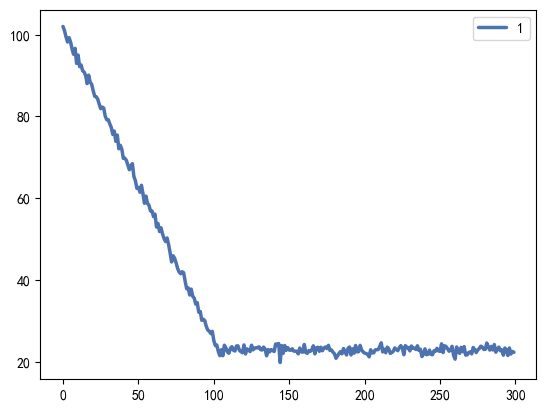

In [37]:
def gen_relative_trend(length=None, lan='en'):
    if length is None:
        length = random.choice([64, 128, 256, 336, 512])
    change_idx = random.randint(length // 4, 3 * length // 4)
    trend_type1 = random.choices(['up', 'down', 'stable'], [0.4, 0.4, 0.2])[0]
    if trend_type1 == 'up':
        trend_type2 = random.choices(['up', 'down', 'stable'], [0.6, 0.1, 0.3])[0]
    elif trend_type1 == 'down':
        trend_type2 = random.choices(['up', 'down', 'stable'], [0.1, 0.6, 0.3])[0]
    else:
        trend_type2 = random.choices(['up', 'down'], [0.5, 0.5])[0]
    def gen_up_down_trend(length, trend, start_value=0, prev_alpha=0): 
        alpha = None
        cnt = 0.5
        while alpha is None or abs(alpha - prev_alpha) < 0.3:
            if trend == 'up':
                end_value = start_value + random.uniform(cnt, 0.5+cnt)
            else :
                end_value = start_value - random.uniform(cnt, 0.5+cnt)
            cnt += 0.5
            alpha = (end_value - start_value) / length
        trend = np.linspace(start_value, end_value, length)
        return trend, alpha
    def gen_stable_trend(length, start_value=0): 
        trend = np.ones(length) * start_value
        return trend
    def norm_ts(ts):
        ts_min = ts.min()
        ts_max = ts.max()
        if ts_max - ts_min < 1e-6:
            return ts - ts_min
        return (ts - ts_min) / (ts_max - ts_min)
    def reconstruct_ts(ts, ts_factor=None):
        ts = norm_ts(ts)
        ts_mean = random.uniform(-0.3, 0.3)
        ts_noise = np.random.normal(0, 0.01, len(ts))
        if ts_factor is None:
            ts_factor = random.uniform(1, 100)
        ts = (ts_mean + ts + ts_noise) * ts_factor
        return ts
    if trend_type1 in ['up', 'down']:
        segment1, alpha1 = gen_up_down_trend(change_idx, trend_type1, start_value=0)
    else:
        segment1 = gen_stable_trend(change_idx, start_value=0)
        alpha1 = 0
    if trend_type2 in ['up', 'down']:
        segment2, alpha2 = gen_up_down_trend(length - change_idx, trend_type2, start_value=segment1[-1], prev_alpha=alpha1)
    else:
        segment2 = gen_stable_trend(length - change_idx, start_value=segment1[-1])
        alpha2 = 0
    ts = np.concatenate([segment1, segment2])
    ts = reconstruct_ts(ts)
    ts = np.round(ts, 3)
    input_text = f'已知有一条长度为 {length} 的时间序列<ts><ts/>，请回答以下问题。该时间序列中趋势变化点在第{change_idx + 1} 个点。请问该时间序列中第一段趋势是上升、下降还是平稳？第二段趋势相较于第一段趋势是加速、减速还是突变亦或是新稳态？请依次回答这两个问题。'
    input_format = f'回答格式为：第一段趋势是 xxx，第二段趋势相较于第一段趋势是 xxx。'
    relative_trend = {
        'up': '上升',
        'down': '下降',
        'stable': '平稳'
    }[trend_type2]
    if lan == 'en':
        input_text = f'Given a time series of length {length} <ts><ts/>, please answer the following question. The trend change point in the time series is at point {change_idx + 1}. What is the first trend in the time series? Is it increasing, decreasing, or stable? How does the second trend compare to the first trend? Is it accelerating, decelerating, mutating, or a new stable state? Please answer these two questions in order.'
        input_format = f'The answer format is: The first trend is xxx, and the second trend compared to the first trend is xxx.'
        relative_trend = {
            'up': 'increase',
            'down': 'decrease',
            'stable': 'stable'
        }[trend_type2]
    if trend_type1 != 'stable':
        if trend_type2 == trend_type1:
            if abs(alpha2) > abs(alpha1) + 0.3:
                relative_trend = '加速' + relative_trend
                if lan == 'en':
                    relative_trend = 'accelerating ' + relative_trend
            elif abs(alpha2) < abs(alpha1) - 0.3:
                relative_trend = '减速' + relative_trend
                if lan == 'en':
                    relative_trend = 'decelerating ' + relative_trend
        else:
            relative_trend = '突变'
            if trend_type2 == 'stable':
                relative_trend = '新稳态'
            if lan == 'en':
                relative_trend = 'mutating'
                if trend_type2 == 'stable':
                    relative_trend = 'a new stable state'
    else:
        if trend_type2 == 'stable':
            relative_trend = '保持平稳'
            if lan == 'en':
                relative_trend = 'remains stable'
        else:
            relative_trend = '突变' + relative_trend
            if lan == 'en':
                relative_trend = 'mutating to ' + relative_trend
    
    answer = {
        "first_trend": {
        'up': '上升',
        'down': '下降',
        'stable': '平稳'
    }[trend_type1],
        "relative_trend": relative_trend
    }
    output_text = f'第一段趋势是 {answer["first_trend"]}，第二段趋势相较于第一段趋势是 {answer["relative_trend"]}。'
    if lan == 'en':
        answer = {
            "first_trend": {
            'up': 'increase',
            'down': 'decrease',
            'stable': 'stable'
        }[trend_type1],
            "relative_trend": relative_trend
        }
        output_text = f'The first trend is {answer["first_trend"]}, and the second trend compared to the first trend is {answer["relative_trend"]}.'
    return {
        'question': input_text,
        'answer': answer,
        'timeseries': ts.tolist(),
        'input': input_text + input_format,
        'output': output_text,
        'meta': {
            'change_point': change_idx + 1,
            'trend_types': (trend_type1, trend_type2),
            'alphas': (alpha1, alpha2)
        }
    }
qa_example = gen_relative_trend(length=300)
print(qa_example['input'])
print(qa_example['output'])
print(type(qa_example['timeseries']))
print(qa_example['meta'])
visual_func(300, [i for i in qa_example['timeseries']] if type(qa_example['timeseries'][0]) is list else [qa_example['timeseries']])

relative_trend=[]
for i in range(100):
    relative_trend.append(gen_relative_trend())
json.dump(relative_trend, open('datasets/relative_eval.json', 'w'), ensure_ascii=False, indent=4)

Based on the relevant information, the anomaly judgment for the time series is as follows:
Time series 1 has a significant platform decrease in this interval, with the value changing from 57.10 to -104.60. According to the relevant information "Time series 1: lower than normal is abnormal", it is determined that time series 1 is in an abnormal state, which is a decrease anomaly.
Time series 2 has a significant platform decrease in this interval, with the value changing from 147.75 to 34.18. According to the relevant information "Time series 2: higher than normal is abnormal", which is inconsistent with the platform decrease of this time series, it is judged that time series 2 is still in a normal state.
Time series 3 has a significant platform decrease in this interval, with the value changing from 2.81 to -16.31. According to the relevant information "Time series 3: lower than normal is abnormal", it is determined that time series 3 is in an abnormal state, which is a decrease anomaly

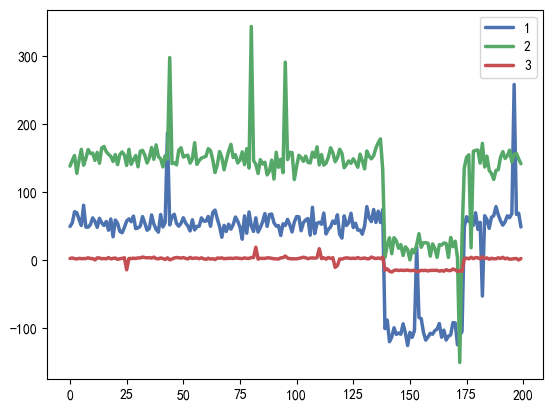

In [38]:
def multi_anomaly_detection(length=None, lan='en'):
    if length == None:
        length = random.randint(128, 512)
        if random.uniform(0, 1) > 0.9:
            length = 305
    ts_num = random.randint(5, min(3000//length, 8))
    ts_num = 3
    ts_list = []
    ts_text_list = []
    segment_info = []
    anomaly_length = random.randint(length // 10, length // 5)
    start_idx = random.randint(0, length - anomaly_length - 1)
    end_idx = start_idx + anomaly_length - 1
    input_text = f'已知有多条时间序列，其中'
    rule_text = f'正常情况下时间序列维持平稳，伴随少量突刺。异常状态时会出现持续整个区间的相同异常情况。不同时序的异常情况不同（分为向上和向下，向上说明此区间值高于正常值，向下则指该区间值低于正常值。注意，哪怕出现了平台变化，但不满足异常情况也属于正常），请判断在区间{start_idx+1}-{end_idx+1} 中，哪些序列出现异常，并说明是向上还是向下异常。每条序列的异常判断规则如下：\n'
    answer = []
    if lan == 'en':
        input_text = f'Given multiple time series, among which '
        rule_text = f'Under normal circumstances, the time series remains stable with a few spikes. In an abnormal state, the same abnormal situation will occur throughout the entire interval. Different time series have different abnormal situations (divided into upward and downward, upward means that the value in this interval is higher than the normal value, and downward means that the value in this interval is lower than the normal value. Note that even if there is a platform change, it is still considered normal if it does not meet the abnormal situation). Please determine which sequences are abnormal in the interval {start_idx+1}-{end_idx+1}, and explain whether it is an upward or downward anomaly. The anomaly judgment rules for each sequence are as follows:\n'
    for i in range(ts_num):
        if random.uniform(0, 1) > 0.7:
            anomaly_type = 'normal'
            base, base_meta = gen_trend(length, 'stable')
            spike, spike_meta = gen_spike(length, 'random', spike_num=random.randint(1, 6))
            noise = np.random.normal(0, 0.05, length)
            ts = base + spike + noise
            ts_mean = np.random.uniform(-0.3, 0.3)
            ts_factor = np.random.uniform(1, 300)
            ts = (ts_mean + ts) * ts_factor
            # 去除stike的均值
            ts_base_mean = (ts_mean + base.mean()) * ts_factor
            ts_list.append(ts)
            if lan=='zh':
                ts_text_list.append(f'时序{i+1}在该区间内与其他位置相比没有明显异常，仍维持在值{ts_base_mean:.2f}附近。')
                input_text += f'时间序列{i+1}为长度{length}的时间序列:<ts><ts/>\n'
                any_anomal = '高于正常为异常' if random.uniform(0, 1) > 0.5 else '低于正常为异常'
                rule_text += f'- 序列{i+1}: {any_anomal}\n'
            if lan == 'en':
                ts_text_list.append(f'Time series {i+1} has no significant anomalies in this interval compared to other locations, and remains around the value of {ts_base_mean:.2f}.')
                any_anomal = 'higher than normal is abnormal' if random.uniform(0, 1) > 0.5 else 'lower than normal is abnormal'
                rule_text += f'- Series {i+1}: {any_anomal}\n'
        elif random.uniform(0, 1) < 0.7:
            anomaly_type = 'up' if random.uniform(0, 1) > 0.5 else 'down'
            base, base_meta = gen_trend(length, 'stable')
            
            segment = np.zeros(length)
            segment[start_idx:end_idx+1] = random.uniform(0.7, 1) if anomaly_type == 'up' else -random.uniform(0.5, 1)
            spike, spike_meta = gen_spike(length, 'random', spike_num=random.randint(1, 6))
            noise = np.random.normal(0, 0.05, length)
            ts = base + segment + spike + noise
            ts_mean = np.random.uniform(-0.3, 0.3)
            ts_factor = np.random.uniform(1, 300)
            ts = (ts_mean + ts) * ts_factor
            ts_base_mean = (ts_mean + base.mean()) * ts_factor
            ts_list.append(ts)
            if lan=='zh':
                anomal = '上升' if anomaly_type == 'up' else '下降'
                anomal_info = '高于' if anomaly_type == 'up' else '低于'
                input_text += f'时间序列{i+1}为长度{length}的时间序列:<ts><ts/>\n'
                ts_text_list.append(f'时序{i+1}在该区间内出现了明显的平台{anomal}，值从{ts_base_mean:.2f}变为{ts[end_idx]:.2f}。根据相关信息“时序{i+1}: {anomal_info}正常为异常”，判断时序{i+1}处于异常状态，为{anomal}异常。')
                rule_text += f'- 序列{i+1}: {anomal_info}正常为异常\n'
                answer.append({
                    "index": i,
                    "direction": anomal,
                })
            if lan == 'en':
                anomal = 'increase' if anomaly_type == 'up' else 'decrease'
                anomal_info = 'higher than' if anomaly_type == 'up' else 'lower than'
                input_text += f'Time series {i+1} is a time series of length {length}:<ts><ts/>\n'
                ts_text_list.append(f'Time series {i+1} has a significant platform {anomal} in this interval, with the value changing from {ts_base_mean:.2f} to {ts[end_idx]:.2f}. According to the relevant information "Time series {i+1}: {anomal_info} normal is abnormal", it is determined that time series {i+1} is in an abnormal state, which is a {anomal} anomaly.')
                rule_text += f'- Series {i+1}: {anomal_info} normal is abnormal\n'
                answer.append({
                    "index": i,
                    "direction": anomal,
                })
        else :
            anomaly_type = 'up' if random.uniform(0, 1) > 0.5 else 'down'
            base, base_meta = gen_trend(length, 'stable')
            segment = np.zeros(length)
            segment[start_idx:end_idx+1] = random.uniform(0.7, 1) if anomaly_type == 'down' else -random.uniform(0.5, 1)
            spike, spike_meta = gen_spike(length, 'random', spike_num=random.randint(1, 6))
            noise = np.random.normal(0, 0.05, length)
            ts = base + segment + spike + noise
            ts_mean = np.random.uniform(-0.3, 0.3)
            ts_factor = np.random.uniform(1, 300)
            ts = (ts_mean + ts) * ts_factor
            ts_base_mean = (ts_mean + base.mean()) * ts_factor
            ts_list.append(ts)
            if lan=='zh':
                anomal = '下降' if anomaly_type == 'up' else '上升'
                anomal_info = '低于' if anomaly_type == 'down' else '高于'
                input_text += f'时间序列{i+1}为长度{length}的时间序列:<ts><ts/>\n'
                ts_text_list.append(f'时序{i+1}在该区间内出现了明显的平台{anomal}，值从{ts_base_mean:.2f}变为{ts[end_idx]:.2f}。根据相关信息“时序{i+1}: {anomal_info}正常为异常”，与该时序的平台{anomal}不符，判断时序{i+1}仍处于正常状态')
                rule_text += f'- 序列{i+1}: {anomal_info}正常为异常\n'
            if lan == 'en':
                anomal = 'decrease' if anomaly_type == 'up' else 'increase'
                anomal_info = 'lower than' if anomaly_type == 'down' else 'higher than'
                input_text += f'Time series {i+1} is a time series of length {length}:<ts><ts/>\n'
                ts_text_list.append(f'Time series {i+1} has a significant platform {anomal} in this interval, with the value changing from {ts_base_mean:.2f} to {ts[end_idx]:.2f}. According to the relevant information "Time series {i+1}: {anomal_info} normal is abnormal", which is inconsistent with the platform {anomal} of this time series, it is judged that time series {i+1} is still in a normal state.')
                rule_text += f'- Series {i+1}: {anomal_info} normal is abnormal\n'
    input_text += '。\n' + rule_text
    output_text = f'根据相关信息，时序的异常判断如下：\n'
    if lan == 'en':
        output_text = f'Based on the relevant information, the anomaly judgment for the time series is as follows:\n'
    output_text += '\n'.join(ts_text_list)
    # return {
    #     'question': input_text,
    #     'answer': answer,
    #     'timeseries': [ts.tolist() for ts in ts_list]
    # }
    return {
        'input': input_text,
        'output': output_text,
        'answer': answer,
        'question': input_text,
        'timeseries': [ts.tolist() for ts in ts_list]
    }
# multi_anomaly_detection_task = []
# for i in range(100):
#     multi_anomaly_detection_task.append(multi_anomaly_detection())
# json.dump(multi_anomaly_detection_task, open('datasets/multi_anomaly_detection_task_eval.json', 'w'), ensure_ascii=False, indent=4)
qa_example = multi_anomaly_detection(length=200)
print(qa_example['output'])
visual_func(200, [i for i in qa_example['timeseries']]) 
data = []
for i in range(100):
    qa_example = multi_anomaly_detection(length=random.randint(196, 336))
    data.append(qa_example)
json.dump(data, open('datasets/anomaly_detection_eval.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)

Given multiple time series, among which Time series 1 is a time series of length 200:<ts><ts/>
Time series 2 is a time series of length 200:<ts><ts/>
Time series 3 is a time series of length 200:<ts><ts/>
。
Under normal circumstances, the time series remains stable with a few spikes. In an abnormal state, the same abnormal situation will occur throughout the entire interval. Different time series have different abnormal situations (divided into upward and downward, upward means that the value in this interval is higher than the normal value, and downward means that the value in this interval is lower than the normal value. Note that even if there is a platform change, it is still considered normal if it does not meet the abnormal situation). Please identify the anomalies present in the above time series and try to locate the cause of the anomalies.
There are two types of anomaly causes: overall environmental changes that cause all time series to exhibit anomalies in the same interval, 

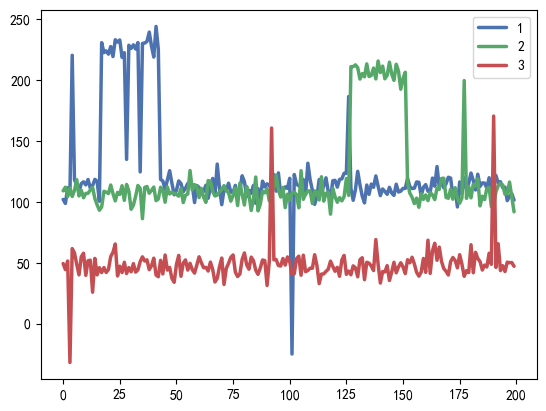

In [28]:

def multi_anomaly_rca(length=None, anomal_type='random', lan='en'):
    if length == None:
        length = random.randint(128, 512)
        if random.uniform(0, 1) > 0.9:
            length = 305
    ts_num = random.randint(5, min(3000//length, 8))
    ts_num = 3
    ts_list = []
    ts_text_list = []
    segment_info = []
    # 异常区间要相同
    anomaly_length = random.randint(length // 10, length // 5)
    
    input_text = f'已知有多条时间序列，其中'
    rule_text = f'正常情况下时间序列维持平稳，伴随少量突刺。异常状态时会出现持续整个区间的相同异常情况。不同时序的异常情况不同（分为向上和向下，向上说明此区间值高于正常值，向下则指该区间值低于正常值。注意，哪怕出现了平台变化，但不满足异常情况也属于正常）。请找出上述时间序列中存在的异常情况，并尝试对异常的原因进行定位。\n异常原因分为两类：整体环境变化引起的所有时序在相同区间内出现异常，不存在异常区间的先后关系； 时序内部异常的传播，最先发生的异常为异常根因, 异常出现的时间体现了传播路径。请结合相关信息判断每条时间序列是否存在异常，并定位异常根因和传播路径（路径由 时序i -> 时序j -> ... 进行表示）。每条序列的异常判断规则如下：\n'
    input_format = f'回答格式为：出现异常的时间序列序号为：i1, i2, i3(根据序号大小排序)。\n根据异常发生时间的先后关系可知传播路径为: ix -> iy -> ...。\n可知异常根因为 时间序列k。'
    if lan == 'en':
        input_text = f'Given multiple time series, among which '
        rule_text = f'Under normal circumstances, the time series remains stable with a few spikes. In an abnormal state, the same abnormal situation will occur throughout the entire interval. Different time series have different abnormal situations (divided into upward and downward, upward means that the value in this interval is higher than the normal value, and downward means that the value in this interval is lower than the normal value. Note that even if there is a platform change, it is still considered normal if it does not meet the abnormal situation). Please identify the anomalies present in the above time series and try to locate the cause of the anomalies.\nThere are two types of anomaly causes: overall environmental changes that cause all time series to exhibit anomalies in the same interval, without any precedence of anomaly intervals; propagation of internal anomalies within the time series, where the earliest occurring anomaly is the root cause of the anomaly, and the time of anomaly occurrence reflects the propagation path. Please determine whether each time series is abnormal based on relevant information, and locate the root cause of the anomaly and the propagation path (the path is represented by Time Series i -> Time Series j -> ...). The anomaly judgment rules for each sequence are as follows:\n'
        input_format = f'The answer format is: The serial numbers of the time series with anomalies are: i1, i2, i3 (sorted by serial number).\nAccording to the precedence of anomaly occurrence, the propagation path is: ix -> iy -> ... .\nThe root cause of the anomaly is Time Series k.'
    answer = []
    if anomal_type == 'random':
        anomal_type = random.choices(['same_interval', 'different_interval'], [0.5, 0.5])[0]
        anomal_type = 'different_interval'
    rca_summary = ''
    rca_link = 'test'
    if anomal_type == 'same_interval':
        start_idx = random.randint(0, length - anomaly_length - 1)
        end_idx = start_idx + anomaly_length - 1
        rca_text = f'根据相关信息，多条时间序列均在第 {start_idx+1} 个点到第 {end_idx+1} 个点同时出现了明显的区间异常，故该区间内的异常可能与整体环境变化有关。'
        if lan == 'en':
            rca_text = f'According to relevant information, multiple time series simultaneously exhibited significant interval anomalies from point {start_idx+1} to point {end_idx+1}, suggesting that the anomalies within this interval may be related to overall environmental changes.'
        for i in range(ts_num):
            if random.uniform(0, 1) > 0.7:
                anomaly_type = 'normal'
                base, base_meta = gen_trend(length, 'stable')
                spike, spike_meta = gen_spike(length, 'random', spike_num=random.randint(1, 6))
                noise = np.random.normal(0, 0.05, length)
                ts = base + spike + noise
                ts_mean = np.random.uniform(-0.3, 0.3)
                ts_factor = np.random.uniform(1, 300)
                ts = (ts_mean + ts) * ts_factor
                # 去除stike的均值
                ts_base_mean = (ts_mean + base.mean()) * ts_factor
                ts_list.append(ts)
                if lan=='zh':
                    ts_text_list.append(f'时序{i+1}在该区间内与其他位置相比没有明显异常，仍维持在值{ts_base_mean:.2f}附近。')
                    input_text += f'时间序列{i+1}为长度{length}的时间序列:<ts><ts/>\n'
                    any_anomal = '高于正常为异常' if random.uniform(0, 1) > 0.5 else '低于正常为异常'
                    rule_text += f'- 序列{i+1}: {any_anomal}\n'
                if lan == 'en':
                    ts_text_list.append(f'Time series {i+1} has no significant anomalies in this interval compared to other locations, and remains around the value of {ts_base_mean:.2f}.')
                    input_text += f'Time series {i+1} is a time series of length {length}:<ts><ts/>\n'
                    any_anomal = 'higher than normal is abnormal' if random.uniform(0, 1) > 0.5 else 'lower than normal is abnormal'
                    rule_text += f'- Series {i+1}: {any_anomal}\n'
            elif random.uniform(0, 1) < 0.7:
                anomaly_type = 'up' if random.uniform(0, 1) > 0.5 else 'down'
                base, base_meta = gen_trend(length, 'stable')
                
                segment = np.zeros(length)
                segment[start_idx:end_idx+1] = random.uniform(0.7, 1) if anomaly_type == 'up' else -random.uniform(0.5, 1)
                spike, spike_meta = gen_spike(length, 'random', spike_num=random.randint(1, 6))
                noise = np.random.normal(0, 0.05, length)
                ts = base + segment + spike + noise
                ts_mean = np.random.uniform(-0.3, 0.3)
                ts_factor = np.random.uniform(1, 300)
                ts = (ts_mean + ts) * ts_factor
                ts_base_mean = (ts_mean + base.mean()) * ts_factor
                ts_list.append(ts)
                if lan=='zh':
                    anomal = '上升' if anomaly_type == 'up' else '下降'
                    anomal_info = '高于' if anomaly_type == 'up' else '低于'
                    input_text += f'时间序列{i+1}为长度{length}的时间序列:<ts><ts/>\n'
                    ts_text_list.append(f'时序{i+1}在该区间内出现了明显的平台{anomal}，值从{ts_base_mean:.2f}变为{ts[end_idx]:.2f}。根据相关信息“时序{i+1}: {anomal_info}正常为异常”，判断时序{i+1}处于异常状态，为{anomal}异常。')
                    rule_text += f'- 序列{i+1}: {anomal_info}正常为异常\n'
                    answer.append({
                        "index": i,
                        "direction": anomal,
                    })
                if lan == 'en':
                    anomal = 'increase' if anomaly_type == 'up' else 'decrease'
                    anomal_info = 'higher than' if anomaly_type == 'up' else 'lower than'
                    input_text += f'Time series {i+1} is a time series of length {length}:<ts><ts/>\n'
                    ts_text_list.append(f'Time series {i+1} has a significant platform {anomal} in this interval, with the value changing from {ts_base_mean:.2f} to {ts[end_idx]:.2f}. According to the relevant information "Time series {i+1}: {anomal_info} normal is abnormal", it is determined that time series {i+1} is in an abnormal state, which is a {anomal} anomaly.')
                    rule_text += f'- Series {i+1}: {anomal_info} normal is abnormal\n'
                    answer.append({
                        "index": i,
                        "direction": anomal,
                    })
            else :
                anomaly_type = 'up' if random.uniform(0, 1) > 0.5 else 'down'
                base, base_meta = gen_trend(length, 'stable')
                segment = np.zeros(length)
                segment[start_idx:end_idx+1] = random.uniform(0.7, 1) if anomaly_type == 'down' else -random.uniform(0.5, 1)
                spike, spike_meta = gen_spike(length, 'random', spike_num=random.randint(1, 6))
                noise = np.random.normal(0, 0.05, length)
                ts = base + segment + spike + noise
                ts_mean = np.random.uniform(-0.3, 0.3)
                ts_factor = np.random.uniform(1, 300)
                ts = (ts_mean + ts) * ts_factor
                ts_base_mean = (ts_mean + base.mean()) * ts_factor
                ts_list.append(ts)
                if lan=='zh':
                    anomal = '下降' if anomaly_type == 'up' else '上升'
                    anomal_info = '低于' if anomaly_type == 'down' else '高于'
                    input_text += f'时间序列{i+1}为长度{length}的时间序列:<ts><ts/>\n'
                    ts_text_list.append(f'时序{i+1}在该区间内出现了明显的平台{anomal}，值从{ts_base_mean:.2f}变为{ts[end_idx]:.2f}。根据相关信息“时序{i+1}: {anomal_info}正常为异常”，与该时序的平台{anomal}不符，判断时序{i+1}仍处于正常状态')
                    rule_text += f'- 序列{i+1}: {anomal_info}正常为异常\n'
                if lan == 'en':
                    anomal = 'decrease' if anomaly_type == 'up' else 'increase'
                    anomal_info = 'lower than' if anomaly_type == 'down' else 'higher than'
                    input_text += f'Time series {i+1} is a time series of length {length}:<ts><ts/>\n'
                    ts_text_list.append(f'Time series {i+1} has a significant platform {anomal} in this interval, with the value changing from {ts_base_mean:.2f} to {ts[end_idx]:.2f}. According to the relevant information "Time series {i+1}: {anomal_info} normal is abnormal", which is inconsistent with the platform {anomal} of this time series, it is judged that time series {i+1} is still in a normal state.')
                    rule_text += f'- Series {i+1}: {anomal_info} normal is abnormal\n'
    else :
        # 先给出时序异常的先后顺序
        anomal_num = random.randint(2, ts_num)
        anomal_index = random.sample(range(ts_num), anomal_num)
        # 给anomal_index排序，表示异常发生的先后顺序
        rank_list = [i for i in anomal_index]
        random.shuffle(rank_list)
        # 描述异常发生的先后顺序，推导异常链
        rca_link = '时序异常的先后顺序为：' + ' -> '.join([f'时序{rank_list[i]+1}' for i in range(anomal_num)]) + '。'
        if lan == 'en':
            rca_link = 'The order of time series anomalies is: ' + ' -> '.join([f'Time Series {rank_list[i]+1}' for i in range(anomal_num)]) + '.'
        answer = {}
        answer['root_cause'] = rank_list[0]+1
        answer['rank'] = [rank_list[i]+1 for i in range(anomal_num)]
        anomal_interval_list = []
        rca_text = f'根据相关信息，多条时间序列在不同的区间内出现了明显的区间异常，且这些异常存在先后顺序。'
        if lan == 'en':
            rca_text = f'According to relevant information, multiple time series exhibited significant interval anomalies in different intervals, and these anomalies had a precedence order.'

        start_idx_list = random.sample(range(0, length - anomaly_length - 1), anomal_num)
        start_idx_list.sort()
        output_text = f'出现异常的时间序列序号为：'
        output_text += ', '.join([f'时序{i+1}' for i in sorted(anomal_index)]) + '。\n'
        output_text += f'根据异常发生时间的先后关系可知传播路径为: ' + ' -> '.join([f'时序{rank_list[i]+1}' for i in range(anomal_num)]) + '。\n'
        output_text += f'可知异常根因为 时间序列{answer["root_cause"]}。'
        if lan == 'en':
            output_text = f'The serial numbers of the time series with anomalies are: '
            output_text += ', '.join([f'Time Series {i+1}' for i in sorted(anomal_index)]) + '.\n'
            output_text += f'According to the precedence of anomaly occurrence, the propagation path is: ' + ' -> '.join([f'Time Series {rank_list[i]+1}' for i in range(anomal_num)]) + '.\n'
            output_text += f'The root cause of the anomaly is Time Series {answer["root_cause"]}.'
        for i in range(anomal_num):
            start_idx = start_idx_list[i]
            end_idx = start_idx + anomaly_length - 1
            anomal_interval_list.append((start_idx, end_idx))
        ts_factor = np.random.uniform(1, 300)
        for i in range(ts_num):
            if i not in anomal_index:
                anomaly_type = 'normal'
                base, base_meta = gen_trend(length, 'stable')
                spike, spike_meta = gen_spike(length, 'random', spike_num=random.randint(1, 6))
                noise = np.random.normal(0, 0.05, length)
                ts = base + spike + noise
                ts_mean = np.random.uniform(-0.3, 0.3)
                
                ts = (ts_mean + ts) * ts_factor
                ts_base_mean = (ts_mean + base.mean()) * ts_factor
                ts_list.append(ts)
                if lan=='zh':
                    ts_text_list.append(f'时序{i+1}未出现异常情况，整体维持在值{ts_base_mean:.2f}附近。')
                    input_text += f'时间序列{i+1}为长度{length}的时间序列:<ts><ts/>\n'
                    any_anomal = '高于正常为异常' if random.uniform(0, 1) > 0.5 else '低于正常为异常'
                    rule_text += f'- 序列{i+1}: {any_anomal}\n'
                if lan == 'en':
                    ts_text_list.append(f'Time series {i+1} did not exhibit any anomalies and remained around the value of {ts_base_mean:.2f}.')
                    input_text += f'Time series {i+1} is a time series of length {length}:<ts><ts/>\n'
                    any_anomal = 'higher than normal is abnormal' if random.uniform(0, 1) > 0.5 else 'lower than normal is abnormal'
                    rule_text += f'- Series {i+1}: {any_anomal}\n'
            else:
                anomaly_type = 'up' if random.uniform(0, 1) > 0.5 else 'down'
                base, base_meta = gen_trend(length, 'stable')
                segment = np.zeros(length)
                start_idx, end_idx = anomal_interval_list[rank_list.index(i)]
                segment[start_idx:end_idx+1] = random.uniform(0.7, 1) if anomaly_type == 'up' else -random.uniform(0.5, 1)
                spike, spike_meta = gen_spike(length, 'random', spike_num=random.randint(1, 6))
                noise = np.random.normal(0, 0.05, length)
                ts = base + segment + spike + noise
                ts_mean = np.random.uniform(-0.3, 0.3)
                ts = (ts_mean + ts) * ts_factor
                ts_base_mean = (ts_mean + base.mean()) * ts_factor
                ts_list.append(ts)  
                if lan=='zh':
                    anomal = '上升' if anomaly_type == 'up' else '下降'
                    anomal_info = '高于' if anomaly_type == 'up' else '低于'
                    input_text += f'时间序列{i+1}为长度{length}的时间序列:<ts><ts/>\n'
                    ts_text_list.append(f'时序{i+1}在第 {start_idx+1} 个点到第 {end_idx+1} 个点内出现了明显的平台{anomal}，值从{ts_base_mean:.2f}变为{ts[end_idx]:.2f}。根据相关信息“时序{i+1}: {anomal_info}正常为异常”，判断时序{i+1}处于异常状态，为{anomal}异常。')
                    rule_text += f'- 序列{i+1}: {anomal_info}正常为异常\n'
                    if rank_list.index(i) == 0:
                        rca_text += f'时序{i+1}在第 {start_idx+1} 个点到第 {end_idx+1} 个点内出现异常，故时序{i+1}的异常可能为异常根因。'
                if lan == 'en':
                    anomal = 'increase' if anomaly_type == 'up' else 'decrease'
                    anomal_info = 'higher than' if anomaly_type == 'up' else 'lower than'
                    input_text += f'Time series {i+1} is a time series of length {length}:<ts><ts/>\n'
                    ts_text_list.append(f'Time series {i+1} exhibited a significant platform {anomal} from point {start_idx+1} to point {end_idx+1}, with the value changing from {ts_base_mean:.2f} to {ts[end_idx]:.2f}. According to the relevant information "Time series {i+1}: {anomal_info} normal is abnormal", it is determined that time series {i+1} is in an abnormal state, which is a {anomal} anomaly.')
                    rule_text += f'- Series {i+1}: {anomal_info} normal is abnormal\n'
                    if rank_list.index(i) == 0:
                        rca_text += f'Time series {i+1} exhibited anomalies from point {start_idx+1} to point {end_idx+1}, so the anomalies in time series {i+1} may be the root cause of the anomalies.'
    input_text += '。\n' + rule_text
    #output_text = f'根据相关信息，时序的异常判断如下：\n'
    #output_text += '\n'.join(ts_text_list)
    #output_text += '\n' + rca_text + '\n' + rca_summary if anomal_type == 'different_interval' else '' 
    #output_text += rca_link

    return {
        'question': input_text,
        'answer': answer,
        'input': input_text + input_format,
        'output': output_text,
        'timeseries': [ts.tolist() for ts in ts_list]
    }
    return {
        'input': input_text,
        'output': output_text,
        'timeseries': [ts.tolist() for ts in ts_list]
    }

qa_example = multi_anomaly_rca(length=200, anomal_type='different_interval')
print(qa_example['input'])
print(qa_example['output'])
print(qa_example['answer'])
visual_func(200, [i for i in qa_example['timeseries']])

In [39]:
multi_anomaly_rca_task = []
for i in range(100):
    multi_anomaly_rca_task.append(multi_anomaly_rca(length=None, anomal_type='different_interval'))
json.dump(multi_anomaly_rca_task, open('datasets/root_cause_analysis.json', 'w'), ensure_ascii=False, indent=4)

Given multiple time series, among which Time series 1 is a time series of length 200:<ts><ts/>, Time series 2 is a time series of length 200:<ts><ts/>, Time series 3 is a time series of length 200:<ts><ts/>. Perform trend identification for each time series. If there are significant trend change points in the time series, please indicate the position of the change points and explain the trend changes before and after them. (Since the source of the anomalies is consistent, the change point coordinates of the time series with anomalies are the same.) The basic trends you need to identify are: increasing, decreasing, stable. The trends that indicate changes are: significant acceleration/deceleration of increase or decrease, interval oscillation, platform increase or decrease, significant periodic changes.
In your specific answer, please follow the format:
First determine whether there are trend change points. If not, explain the overall trend. If there are, first explain the position of t

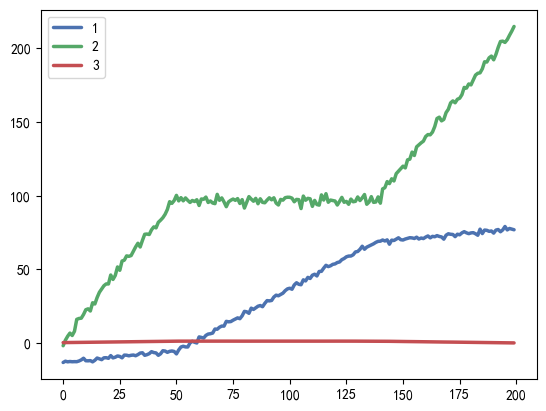

In [40]:
def gen_describe_task(length=None, question_type='random', ts_num=None, lan='en'):
    if length == None:
        length = random.randint(28, 512)
    if question_type == 'random':
        question_type = random.choices(['unify', 'differ'], [1, 0])[0]
    if ts_num is None:
        ts_num = random.randint(2, min(3000//length, 5))
    else :
        ts_num = 1
    ts_num = 3
    ts_list = []
    if question_type == 'unify':
        ts_change_num = random.randint(1, min(3, length // 5))
        change_idx_list = []
        if ts_change_num > 0:
            segment_len = length // (ts_change_num + 1)
            for i in range(ts_change_num):
                change_idx = random.randint(i * segment_len + segment_len // 2, (i + 1) * segment_len + segment_len // 2 - 1)
                change_idx_list.append(change_idx)
            change_idx_list = sorted(change_idx_list)
            
        segment_trend_list = []
        trend_types = ['up', 'down', 'stable', 'oscillate', 'platform_up', 'platform_down']
        def gen_up_down_trend(length, trend, start_value=0, prev_alpha=None): 
            alpha = None
            cnt = 0.1 * length
            while alpha is None or (prev_alpha is not None and abs(alpha - prev_alpha) < 0.5):
                if trend == 'up':
                    end_value = start_value + random.uniform(cnt, 0.5+cnt)
                else :
                    end_value = start_value - random.uniform(cnt, 0.5+cnt)
                cnt += 0.5
                alpha = (end_value - start_value) / length
            trend = np.linspace(start_value, end_value, length)
            return trend, alpha
        def gen_oscillate_trend(length, start_value=0): 
            period = random.randint(1, length // 2)
            amplitude = random.uniform(0.3, 0.7)
            x = np.arange(length)
            trend = start_value + amplitude * np.sin(2 * np.pi * x / period)
            return trend, period, amplitude
        def gen_platform_trend(length, trend, start_value=0):
            if trend == 'platform_up':
                level = start_value + random.uniform(0.5, 1)
            else :
                level = start_value - random.uniform(0.5, 1)
            trend = np.ones(length) * level
            trend[-1] = start_value
            return trend, level
        def norm_ts(ts):
            ts_min = ts.min()
            ts_max = ts.max()
            if ts_max - ts_min < 1e-6:
                return ts - ts_min
            return (ts - ts_min) / (ts_max - ts_min)
        def reconstruct_ts(ts, ts_factor=None):
            ts_mean = random.uniform(-0.3, 0.3)
            ts_noise = np.random.normal(0, 0.01, len(ts))
            if ts_factor is None:
                ts_factor = random.uniform(1, 300)
            ts = (ts_mean + ts + ts_noise) * ts_factor
            return ts
        trend_weights = [0.3, 0.3, 0.4, 0., 0., 0.]
        trend_desc = {
            'up': '上升',
            'down': '下降',
            'stable': '平稳',
            'oscillate': '振荡',
            'platform_up': '平台上升',
            'platform_down': '平台下降'
        }
        if lan == 'en':
            trend_desc = {
                'up': 'increasing',
                'down': 'decreasing',
                'stable': 'stable',
                'oscillate': 'oscillating',
                'platform_up': 'platform increasing',
                'platform_down': 'platform decreasing'
            }
        input_text = f'已知有多条时间序列，其中'
        input_text += ', '.join([f'时间序列{i+1}为长度{length}的时间序列：<ts><ts/>' for i in range(ts_num)]) + f'。分别对每条时间序列进行趋势识别，如果在该条时间序列中存在明显的趋势变点，请指出该变点的位置，并说明前后的趋势变化。（由于异常来源一致， 存在异常的时序变点坐标相同）您需要判断的基本趋势有：上升、下降、平稳。表示变化的趋势有：明显的加速/减速上升、下降， 区间振荡， 平台上升、下降， 明显的周期变化。\n在具体回答中，请遵循格式:\n先判断是否存在趋势变点，如果不存在，说明整体趋势，如果存在，先说明变点位置，再详细分析每个时间序列中变点构成的各个片段的具体趋势。\n请注意，趋势的描述需要包含数值信息，例如上升或下降的变化率, 从而指出是否存在变化加速、减速、趋势反转等情况。\n在对每个时间序列进行描述时，先指出当前片段是从第几个点到第几个点，再说明该片段的趋势类型（平稳，上升，下降， 以及判断上升、下降是加速、减速、突变（由减速变为加速、或加速变为减速）），最后给出数值信息。\n请确保描述的专业性和系统性。'
        input_format = f'先判断各个时序是否存在趋势变点，格式为：根据相关信息，各时序在第 i1, i2, i3,,, 个时间点均存在趋势变化 / 上述时序均不存在明显的趋势变化'
        input_format += f'如果存在变点，依次分析各个时序每一段的趋势是什么， 格式为：时间序列i的每段趋势依次为: xxx, yyy,,,, (使用规定的趋势表述词) / 否则依次回答每个时序的整体趋势， 格式为: 时间序列i的整体趋势为: xxx。 '
        if lan == 'en':
            input_text = f'Given multiple time series, among which '
            input_text += ', '.join([f'Time series {i+1} is a time series of length {length}:<ts><ts/>' for i in range(ts_num)]) + f'. Perform trend identification for each time series. If there are significant trend change points in the time series, please indicate the position of the change points and explain the trend changes before and after them. (Since the source of the anomalies is consistent, the change point coordinates of the time series with anomalies are the same.) The basic trends you need to identify are: increasing, decreasing, stable. The trends that indicate changes are: significant acceleration/deceleration of increase or decrease, interval oscillation, platform increase or decrease, significant periodic changes.\nIn your specific answer, please follow the format:\nFirst determine whether there are trend change points. If not, explain the overall trend. If there are, first explain the position of the change points, and then analyze in detail the specific trends of each segment formed by the change points in each time series.\nPlease note that the description of trends needs to include numerical information, such as the rate of increase or decrease, in order to indicate whether there is acceleration, deceleration, trend reversal, etc.\nWhen describing each time series, first point out which points the current segment is from and to, then explain the type of trend in that segment (stable, increasing, decreasing, and determine whether the increase or decrease is accelerating, decelerating, or sudden (changing from deceleration to acceleration or from acceleration to deceleration)), and finally provide numerical information.\nPlease ensure the professionalism and systematicity of your description.'
            input_format = f'First determine whether there are trend change points in each time series. If not, explain the overall trend. If there are, first explain the position of the change points. The format is: According to relevant information, all time series have trend changes at points i1, i2, i3,,, / The above time series do not have significant trend changes.'
            input_format += f'If there are change points, analyze what each segment of each time series is trending in turn. The format is: The trends of each segment of Time Series i are: xxx, yyy,,,, (using specified trend terms) / Otherwise answer the overall trend of each time series in turn. The format is: The overall trend of Time Series i is: xxx.'
        output_text = ''
        ts_desc_list = []
        ts_list = []
        output_text = ''
        if ts_change_num > 0:
            if lan=='zh':
                output_text += f'根据相关信息， 各时序在第 ' + ', '.join([str(idx + 1) for idx in change_idx_list]) + ' 个时间点均存在趋势变化。\n'
            if lan=='en':
                output_text += f'According to relevant information, all time series have trend changes at points ' + ', '.join([str(idx + 1) for idx in change_idx_list]) + '.\n'
        else :
            if lan=='zh':
                output_text += f'上述时序均不存在明显的趋势变化\n'
            if lan=='en':
                output_text += f'The above time series do not have significant trend changes.\n'
        answer = {}
        for ts_i in range(ts_num):
            segment_trends = []
            prev_trend = None
            prev_alpha = None
            prev_beta = None
            ts = np.zeros(length)
            ts_desc = f'' 
            answer[ts_i] = []
            if ts_change_num == 0:
                trend = random.choices(trend_types, [0.3, 0.3, 0.4, 0, 0, 0])[0]
                segment_trends.append(trend)
                if lan=='zh':
                    ts_desc += f'时间序列{ts_i+1}的整体趋势为: {trend_desc[trend]}'
                if lan=='en':
                    ts_desc += f'The overall trend of Time Series {ts_i+1} is: {trend_desc[trend]}'
                if trend != 'stable':
                    trend_segment, alpha = gen_up_down_trend(length, trend, ts[0])
                    ts[:] = trend_segment
                    ts = reconstruct_ts(ts)
                    #ts_desc += f'该时序从起始点开始，值从 {ts[0]:.2f} 变化到 {ts[-1]:.2f} 线性变化，变化率约为 {alpha:.4f}。'
                else :
                    ts[:] = 0
                    ts = reconstruct_ts(ts)
                    #ts_desc += f'该时序整体保持在值 {ts[0]:.2f} 附近。'
                answer[ts_i].append(trend)
                ts_desc_list.append(ts_desc)
                ts_list.append(ts)
                output_text += ts_desc + '\n'
                continue
            else :
                if lan=='zh':
                    output_text += f'时间序列{ts_i+1}的每段趋势依次为: ' 
                if lan=='en':
                    output_text += f'The trends of each segment of Time Series {ts_i+1} are: '
                ts_desc = ''
            for seg in range(ts_change_num + 1):
                trend = random.choices(trend_types, trend_weights)[0]
                if seg == 0:
                    trend = random.choices(['up', 'down', 'stable'], [0.4, 0.4, 0.2])[0]
                while trend == prev_trend and trend in ['stable']: # 避免连续两个段为平稳
                    trend = random.choices(trend_types, trend_weights)[0]
                segment_trends.append(trend)
                prev_trend = trend
                start_idx = change_idx_list[seg - 1] if seg > 0 else 0
                end_idx = change_idx_list[seg] - 1 if seg < ts_change_num else length - 1
                seg_length = end_idx - start_idx + 1
                ts[start_idx] = 0 if start_idx == 0 else ts[start_idx - 1]
                if trend == 'stable': # 平稳
                    ts[start_idx:end_idx + 1] = ts[start_idx]
                elif trend in ['up', 'down']:
                    if prev_trend == trend:
                        trend_segment, alpha = gen_up_down_trend(seg_length, trend, ts[start_idx], prev_alpha)
                    else :
                        trend_segment, alpha = gen_up_down_trend(seg_length, trend, ts[start_idx])
                    ts[start_idx:end_idx + 1] = trend_segment
                elif trend == 'oscillate':
                    trend_segment, alpha, beta = gen_oscillate_trend(seg_length, ts[start_idx])
                    ts[start_idx:end_idx + 1] = trend_segment
                elif trend in ['platform_up', 'platform_down']:
                    trend_segment, alpha = gen_platform_trend(seg_length, trend, ts[start_idx])
                    ts[start_idx:end_idx + 1] = trend_segment
                if trend in ['up', 'down']:
                    segment_trends[-1] = (trend, start_idx, end_idx, alpha)
                    prev_alpha = alpha
                elif trend == 'oscillate':
                    segment_trends[-1] = (trend, start_idx, end_idx, alpha, beta)
                    prev_alpha = alpha
                    prev_beta = beta
                elif trend in ['platform_up', 'platform_down']:
                    segment_trends[-1] = (trend, start_idx, end_idx, alpha)
                    prev_alpha = None
                else :
                    segment_trends[-1] = (trend, start_idx, end_idx)
                    prev_alpha = None
                ts_desc_list.append(ts_desc)
                if segment_trends[-1] == 0:
                    print(f'debug {trend}')
            ts = norm_ts(ts)
            ts = reconstruct_ts(ts)
            ts_list.append(ts)
            answer['change_points'] = [i for i in change_idx_list]
            ts_descs = []
            for seg in range(ts_change_num + 1):   
                segment_trend = segment_trends[seg]
                prev_trend = segment_trends[seg - 1][0] if seg > 0 else None
                prev_alpha = segment_trends[seg - 1][3] if seg > 0 and type(segment_trends[seg - 1]) is not str and segment_trends[seg - 1][0] in ['up', 'down'] else None
                prev_beta = segment_trends[seg - 1][4] if seg > 0 and type(segment_trends[seg - 1]) is not str and segment_trends[seg - 1][0] == 'oscillate' else None
                
                if type(segment_trend) is str:
                    trend = segment_trend
                    start_idx = change_idx_list[seg - 1] if seg > 0 else 0
                    end_idx = change_idx_list[seg] - 1 if seg < ts_change_num else length - 1
                    alpha = None
                elif segment_trend[0] in ['up', 'down']:
                    trend, start_idx, end_idx, alpha = segment_trend
                elif segment_trend[0] == 'oscillate':
                    trend, start_idx, end_idx, alpha, beta = segment_trend
                elif segment_trend[0] in ['platform_up', 'platform_down']:
                    trend, start_idx, end_idx, alpha = segment_trend
                else :
                    trend, start_idx, end_idx = segment_trend
                    alpha = None
                if trend in ['up', 'down']:
                    alpha = (ts[end_idx] - ts[start_idx]) / (end_idx - start_idx + 1)
                    
                    if prev_alpha is not None:
                        if (trend == 'up' and prev_trend == 'up') or (trend == 'down' and prev_trend == 'down'):
                            if abs(alpha) > abs(prev_alpha) + 0.1:
                                if lan=='zh':
                                    ts_desc += f'该段趋势为加速{trend_desc[trend]}，值从 {ts[start_idx]:.2f} 变化到 {ts[end_idx]:.2f} 线性变化，变化率约为 {alpha:.4f}，与前一段{trend_desc[prev_trend]}趋势相比，变化率明显加快。\n'
                                    ts_desc = '加速' + trend_desc[trend]
                                    trend = 'accelerate_' + trend
                                if lan=='en':
                                    ts_desc += f'This segment shows an accelerating {trend_desc[trend]}, with values changing linearly from {ts[start_idx]:.2f} to {ts[end_idx]:.2f}, at a rate of approximately {alpha:.4f}. Compared to the previous {trend_desc[prev_trend]} trend, the rate of change has significantly increased.\n'
                                    ts_desc = 'accelerating' + trend_desc[trend]
                                    trend = 'accelerate_' + trend
                            elif abs(alpha) < abs(prev_alpha) - 0.1:
                                if lan=='zh':
                                    ts_desc += f'该段趋势为减速{trend_desc[trend]}，值从 {ts[start_idx]:.2f} 变化到 {ts[end_idx]:.2f} 线性变化，变化率约为 {alpha:.4f}，与前一段{trend_desc[prev_trend]}趋势相比，变化率明显减缓。\n'
                                    ts_desc = '减速' + trend_desc[trend]
                                    trend = 'decelerate_' + trend
                                if lan=='en':
                                    ts_desc += f'This segment shows a decelerating {trend_desc[trend]}, with values changing linearly from {ts[start_idx]:.2f} to {ts[end_idx]:.2f}, at a rate of approximately {alpha:.4f}. Compared to the previous {trend_desc[prev_trend]} trend, the rate of change has significantly decreased.\n'
                                    ts_desc = 'decelerating' + trend_desc[trend]
                                    trend = 'decelerate_' + trend
                                
                        elif (trend == 'up' and prev_trend == 'down') or (trend == 'down' and prev_trend == 'up'):
                            if lan=='zh':
                                ts_desc += f'该段趋势为突变{trend_desc[trend]}，值从 {ts[start_idx]:.2f} 变化到 {ts[end_idx]:.2f} 线性变化，变化率约为 {alpha:.4f}，与前一段{trend_desc[prev_trend]}趋势相比，趋势方向发生了突变。\n'
                                ts_desc = '突变' + str(trend_desc[trend])
                                trend = 'reverse_' + trend
                            if lan=='en':
                                ts_desc += f'This segment shows a sudden {trend_desc[trend]}, with values changing linearly from {ts[start_idx]:.2f} to {ts[end_idx]:.2f}, at a rate of approximately {alpha:.4f}. Compared to the previous {trend_desc[prev_trend]} trend, the trend direction has undergone a sudden change.\n'
                                ts_desc = 'sudden' + str(trend_desc[trend])
                                trend = 'reverse_' + trend
                            
                        else :
                            if lan=='zh':
                                ts_desc += f'该段趋势为{trend_desc[trend]}，值从 {ts[start_idx]:.2f} 变化到 {ts[end_idx]:.2f} 线性变化，变化率约为 {alpha:.4f}。\n'
                                ts_desc = trend_desc[trend]
                            if lan=='en':
                                ts_desc += f'This segment shows a {trend_desc[trend]}, with values changing linearly from {ts[start_idx]:.2f} to {ts[end_idx]:.2f}, at a rate of approximately {alpha:.4f}.\n'
                                ts_desc = trend_desc[trend]
                    else :
                        if lan=='zh':
                            ts_desc += f'该段趋势为{trend_desc[trend]}，值从 {ts[start_idx]:.2f} 变化到 {ts[end_idx]:.2f} 线性变化，变化率约为 {alpha:.4f}。\n'
                            ts_desc = trend_desc[trend]
                        if lan=='en':
                            ts_desc += f'This segment shows a {trend_desc[trend]}, with values changing linearly from {ts[start_idx]:.2f} to {ts[end_idx]:.2f}, at a rate of approximately {alpha:.4f}.\n'
                            ts_desc = trend_desc[trend]
                elif trend == 'stable':
                    if lan=='zh':
                        ts_desc += f'该段趋势为{trend_desc[trend]}，整体保持在值 {ts[start_idx]:.2f} 附近。'
                    if lan=='en':   
                        ts_desc += f'This segment shows a {trend_desc[trend]}, remaining around the value of {ts[start_idx]:.2f}.'
                    if seg > 0 : 
                        if lan=='zh':
                            ts_desc += f'此时该时序达到了新的稳态。\n'
                            ts_desc = '新稳态'
                        if lan=='en':
                            ts_desc += f'At this point, the time series has reached a new steady state.\n'
                            ts_desc = 'new steady state'
                    else :
                        if lan=='zh':
                            ts_desc += f'此时该时序保持在值 {ts[start_idx]:.2f} 附近。\n'
                            ts_desc = '稳态'
                        if lan=='en':
                            ts_desc += f'At this point, the time series remains around the value of {ts[start_idx]:.2f}.\n'
                            ts_desc = 'steady state'
                elif trend == 'oscillate':
                    alpha = (ts.max() - ts.min()) / 2
                    if lan=='zh':
                        ts_desc += f'该段趋势为{trend_desc[trend]}，值在 {ts[start_idx-1]:.2f} 附近以周期约为 {beta} 的周期进行振荡，振幅约为 {alpha:.2f}。'
                    if lan=='en':
                        ts_desc += f'This segment shows an {trend_desc[trend]}, with values oscillating around {ts[start_idx-1]:.2f} with a period of approximately {beta} and an amplitude of approximately {alpha:.2f}.'
                    if prev_trend == 'oscillate':
                        if abs(alpha) > abs(prev_beta) * 1.5:
                            if lan=='zh':
                                ts_desc += f'与前一段{trend_desc[prev_trend]}趋势相比，振幅明显增大'
                            if lan=='en':
                                ts_desc += f'Compared to the previous {trend_desc[prev_trend]} trend, the amplitude has significantly increased'
                            trend = 'amplitude_increase_oscillate'
                        elif abs(alpha) < abs(prev_beta) * 0.67:
                            if lan=='zh':
                                ts_desc += f'与前一段{trend_desc[prev_trend]}趋势相比，振幅明显减小'
                            if lan=='en':
                                ts_desc += f'Compared to the previous {trend_desc[prev_trend]} trend, the amplitude has significantly decreased'
                            trend = 'amplitude_decrease_oscillate'
                        if abs(beta) > abs(prev_beta) * 1.5:
                            if lan=='zh':
                                ts_desc += f',周期明显变长。'
                            if lan=='en':
                                ts_desc += f', the period has significantly increased.'
                            trend = 'period_increase_oscillate'
                        elif abs(beta) < abs(prev_beta) * 0.67:
                            if lan=='zh':
                                ts_desc += f'，周期明显变短。'
                            if lan=='en':
                                ts_desc += f', the period has significantly decreased.'
                            trend = 'period_decrease_oscillate'
                        if ts_desc.endswith('，'):
                            ts_desc = ts_desc[:-1] + '。\n'
                        else :
                            ts_desc += '\n'
                elif trend in ['platform_up', 'platform_down']:
                    if lan=='zh':
                        ts_desc += f'该段趋势为{trend_desc[trend]}，值从 {ts[start_idx-1]:.2f} 突然整段变化到 {ts[start_idx]:.2f}， 最后又回到 {ts[end_idx]:.2f}，形成了一个明显的{trend_desc[trend]}。'
                    if lan=='en':   
                        ts_desc += f'This segment shows a {trend_desc[trend]}, with values suddenly changing from {ts[start_idx-1]:.2f} to {ts[start_idx]:.2f}, and finally returning to {ts[end_idx]:.2f}, forming a significant {trend_desc[trend]}.'
                    if prev_trend in ['platform_up', 'platform_down']:
                        if prev_trend != trend:
                            if lan=='zh':
                                ts_desc += f'与前一段{trend_desc[prev_trend]}趋势相比，趋势方向发生了突变。\n'
                            if lan=='en':
                                ts_desc += f'Compared to the previous {trend_desc[prev_trend]} trend, the trend direction has undergone a sudden change.\n'
                            trend = 'reverse_' + trend
                        else :
                            if lan=='zh':
                                ts_desc += f'与前一段{trend_desc[prev_trend]}趋势相比，'
                            if lan=='en':
                                ts_desc += f'Compared to the previous {trend_desc[prev_trend]} trend, '
                            alpha = ts[start_idx] - ts[start_idx-1]
                            prev_alpha = ts[change_idx_list[seg - 1] - 1] - ts[change_idx_list[seg - 1] - 2] if seg > 1 else ts[change_idx_list[seg - 1] - 1] - ts[change_idx_list[seg - 1] - 1]
                            if abs(alpha) > abs(prev_alpha) * 1.5:
                                if lan=='zh':
                                    ts_desc += f'平台变化的幅度明显增大。\n'
                                if lan=='en':
                                    ts_desc += f'The amplitude of platform change has significantly increased.\n'
                                trend = 'amplitude_increase_' + trend
                            elif abs(alpha) < abs(prev_alpha) * 0.67:
                                if lan=='zh':
                                    ts_desc += f'平台变化的幅度明显减小。\n'
                                if lan=='en':
                                    ts_desc += f'The amplitude of platform change has significantly decreased.\n'
                                trend = 'amplitude_decrease_' + trend
                            else :
                                ts_desc += '\n'
                answer[ts_i].append(trend)
                prev_trend = trend
                ts_descs.append(ts_desc)
                # if ts_desc[-1] != '\n':
                #     ts_desc += '\n'
            ts_desc_list.append(ts_desc)
            if ts_change_num > 0 :
                output_text += ', '.join(ts_descs)
                output_text = output_text.strip()
                output_text += '。\n'
        timeseries = [ts.tolist() for ts in ts_list]
        # return {
        #     'question' : input_text,
        #     'answer' : answer,
        #     'timeseries' : timeseries
        # }
        return {
            'question' : input_text,
            'answer' : answer,
            "input": input_text+input_format,
            "output": output_text,
            "timeseries": timeseries
        }
# 测试上述函数
qa_example = gen_describe_task(length=200, question_type='unify', ts_num=3, lan='en')
plot_ts = qa_example['timeseries']
print(qa_example['input'])
print(qa_example['output'])
visual_func(200, [i for i in plot_ts] if type(plot_ts[0]) is list else [plot_ts])  # 可视化生成的时间序列数据
import json
multi_change_trend_task = []
for i in range(100):
    multi_change_trend_task.append(gen_multi_change_trend_task(length=None))
json.dump(multi_change_trend_task, open('datasets/describe_eval.json', 'w'), ensure_ascii=False, indent=4)